In [71]:
import pandas as pd
import plotly
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

min_val = []
max_val =[]

min_max_scaler = preprocessing.MinMaxScaler()
file =('Battaramulla.xlsx')
df = pd.read_excel(file)
df=df.drop(['Period Start Time', 'Period End Time','Rain Gauge'], axis = 1)
df = df.dropna()
df = df.drop(['Solar Rad'],axis='columns')

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        max_val.append(max_value)
        min_value = df[feature_name].min()
        min_val.append(min_value)
        if df[feature_name].max()!= df[feature_name].min():
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        else:
            result[feature_name]=0
        
    return result

df=normalize(df)

x=df.drop(['O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc','PM10 Conc'],axis='columns')
y=df['O3 Conc']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
lr_clf = LinearRegression()
model = lr_clf.fit(x_train,y_train)
print(lr_clf.score(x_test,y_test))

values = [float(i) for i in input("Enter parameter values: ").split()]

para = []
i=0
for val in values:
    para.append((val- min_val[i]) / (max_val[i] - min_val[i]))
    i=i+1
    
o3=model.predict([para])
o3=(o3[0]*(max_val[5] - min_val[5]))+min_val[5]
print(o3)

0.5317763884379372
Enter parameter values: 30.7 64.6 1008.1 2.2 235
20.41770574492755


In [72]:
import pandas as pd
import plotly
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

min_val = []
max_val =[]

min_max_scaler = preprocessing.MinMaxScaler()
file =('Battaramulla.xlsx')
df = pd.read_excel(file)
df=df.drop(['Period Start Time', 'Period End Time','Rain Gauge'], axis = 1)
df = df.drop(['Solar Rad'],axis='columns')
title = ['AT', 'RH', 'BP', 'WS Raw', 'WD Raw',
       'O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc',
       'PM10 Conc']
for t in title:
    df[t]=df[t].fillna(df[t].mean())
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        max_val.append(max_value)
        min_value = df[feature_name].min()
        min_val.append(min_value)
        if df[feature_name].max()!= df[feature_name].min():
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        else:
            result[feature_name]=0
        
    return result

df=normalize(df)

x=df.drop(['O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc','PM10 Conc'],axis='columns')
y=df['O3 Conc']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
lr_clf = LinearRegression()
model = lr_clf.fit(x_train,y_train)
print(lr_clf.score(x_test,y_test))

values = [float(i) for i in input("Enter parameter values: ").split()]

para = []
i=0
for val in values:
    para.append((val- min_val[i]) / (max_val[i] - min_val[i]))
    i=i+1
    
o3=model.predict([para])
o3=(o3[0]*(max_val[5] - min_val[5]))+min_val[5]
print(o3)

0.46092626680389215
Enter parameter values: 30.7 64.6 1008.1 2.2 235
20.75603109888207


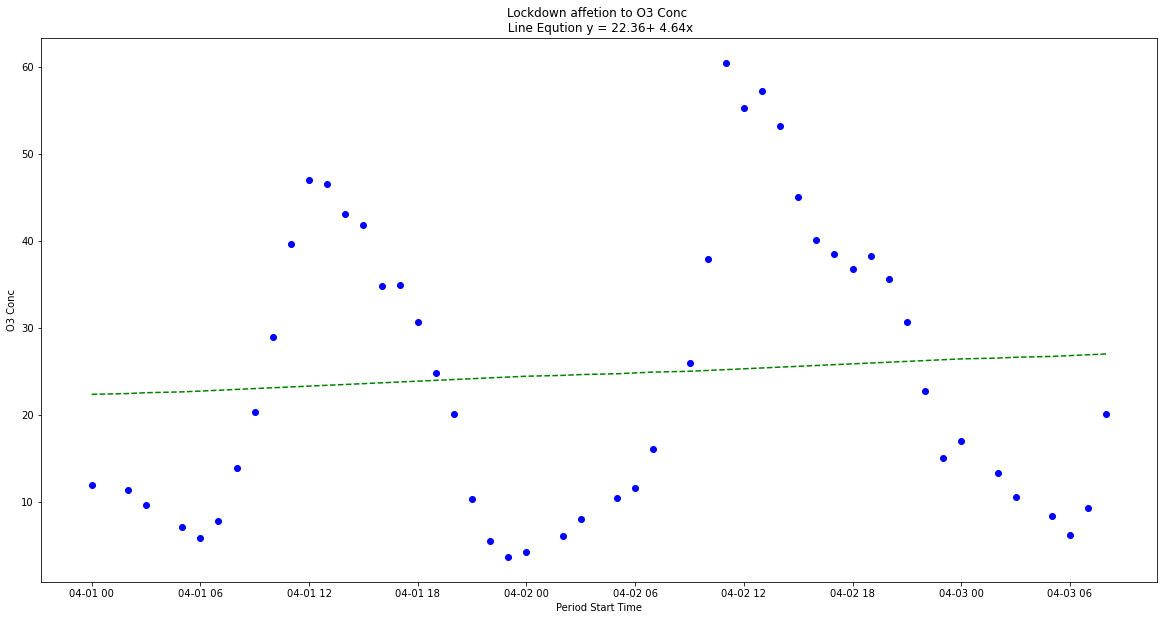

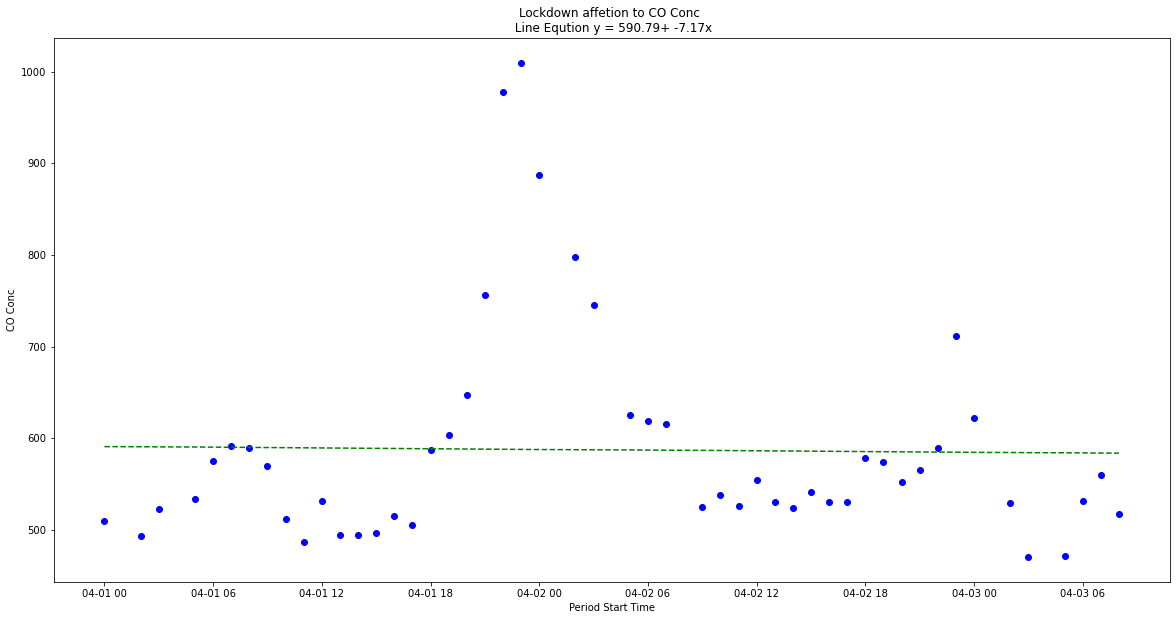

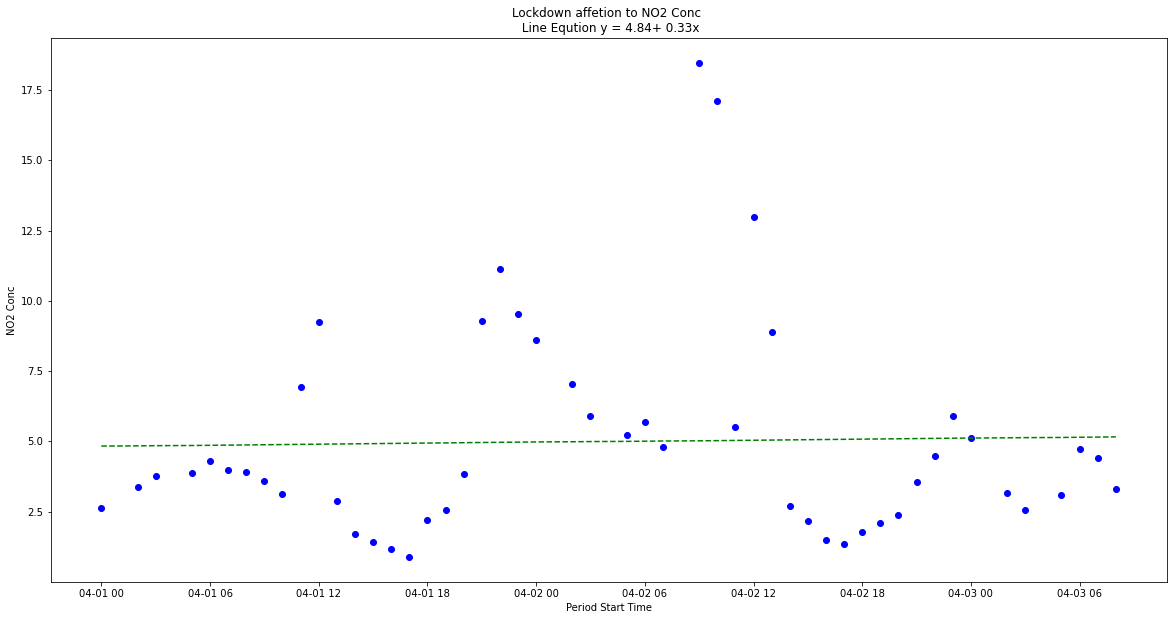

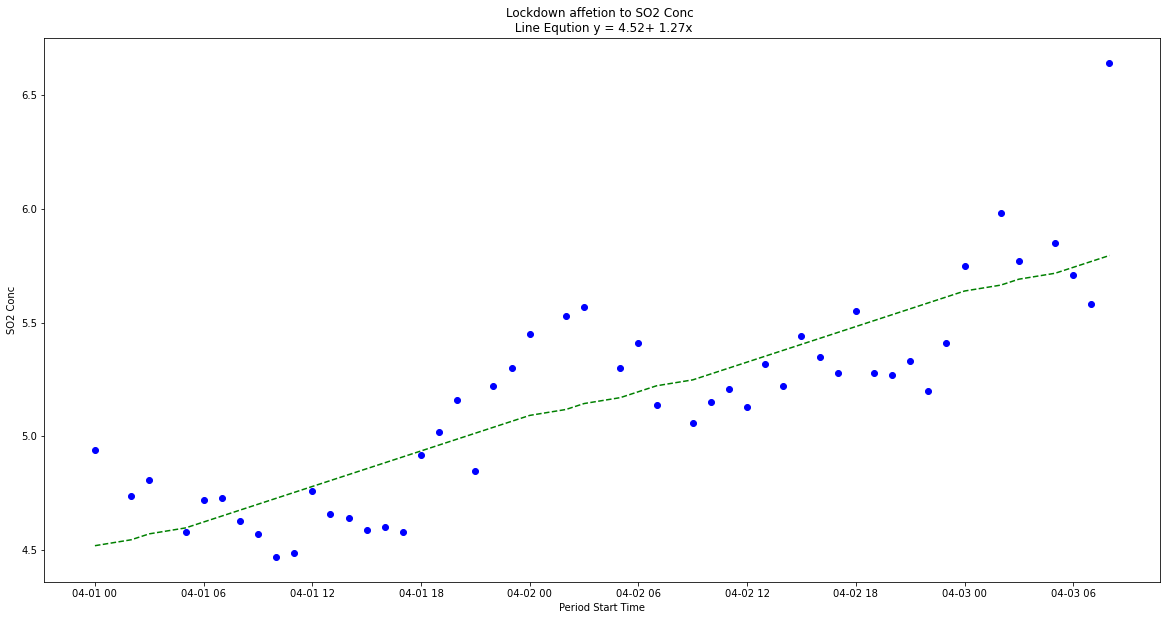

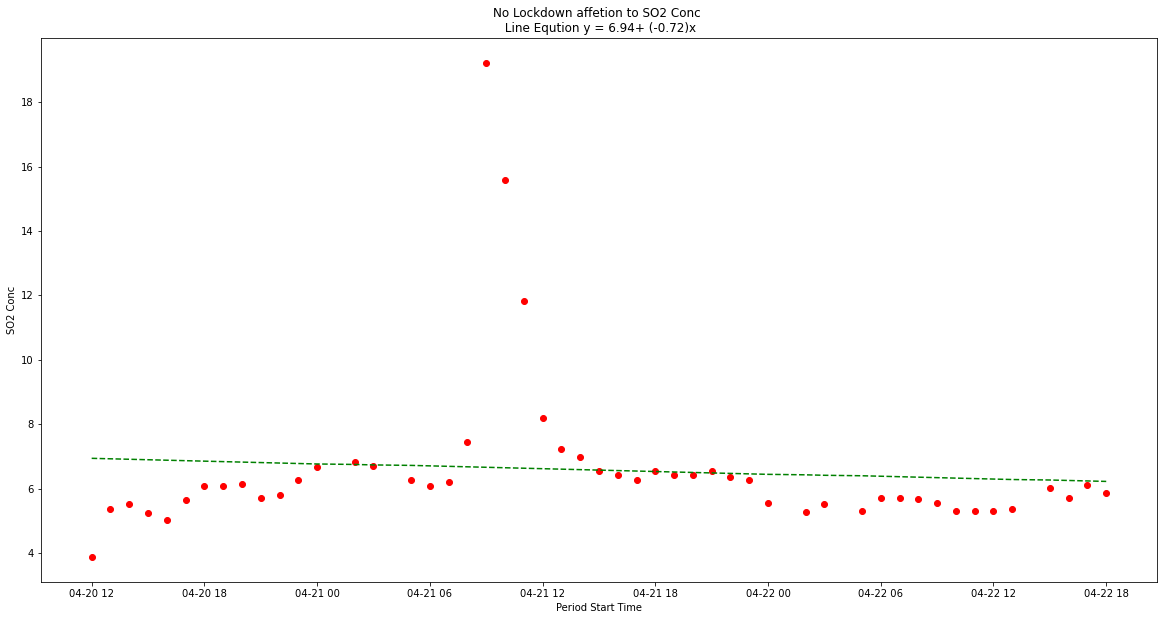

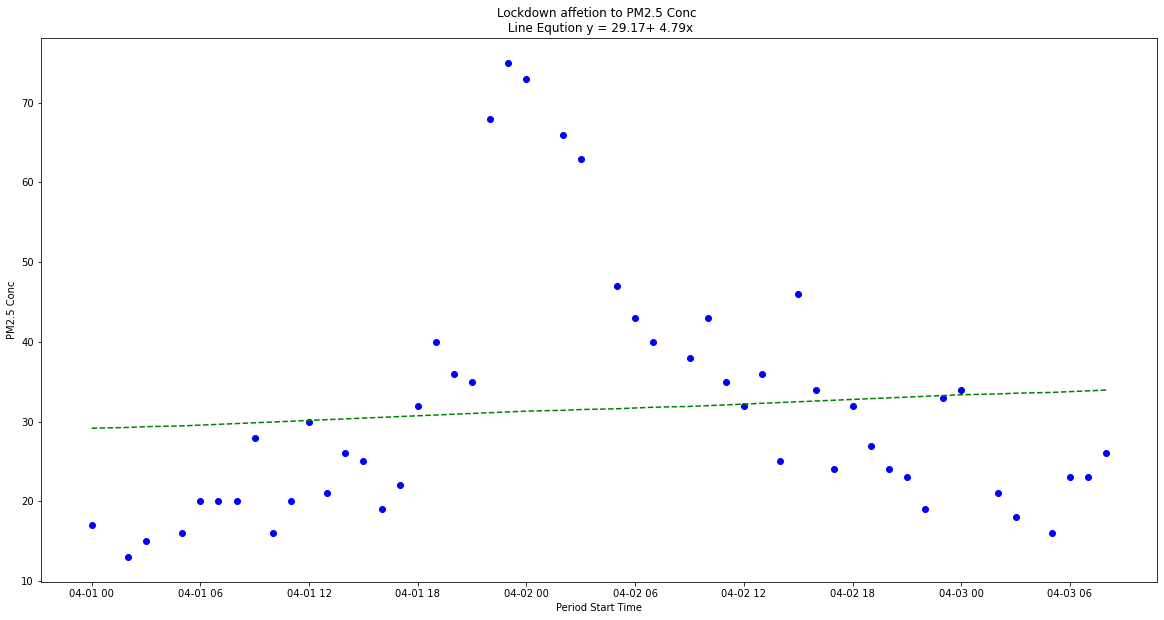

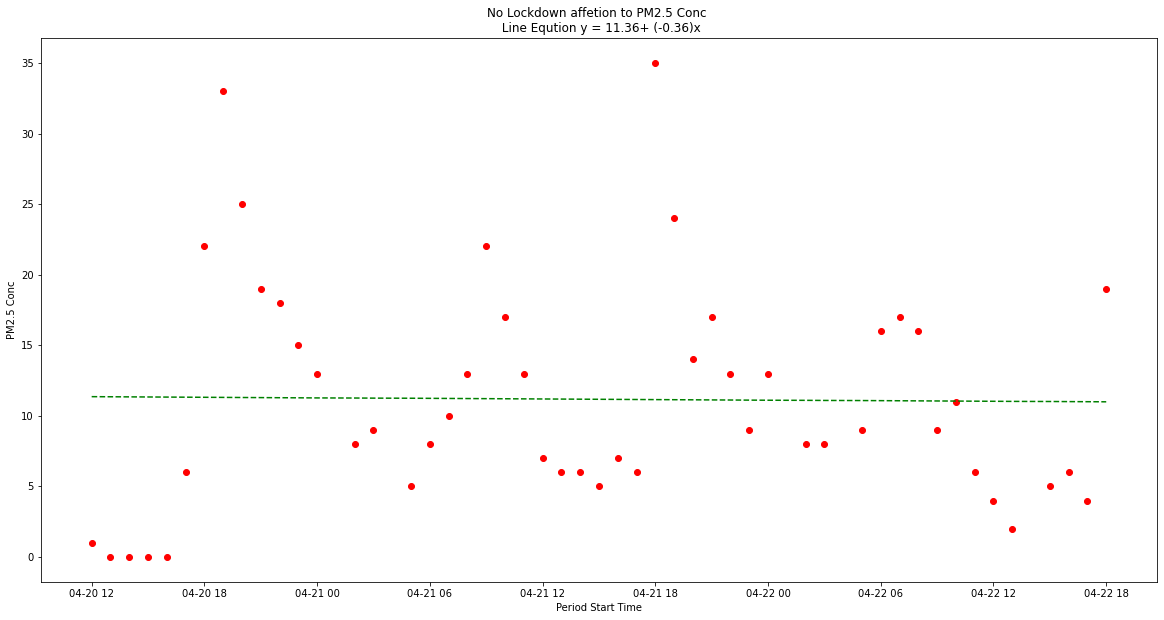

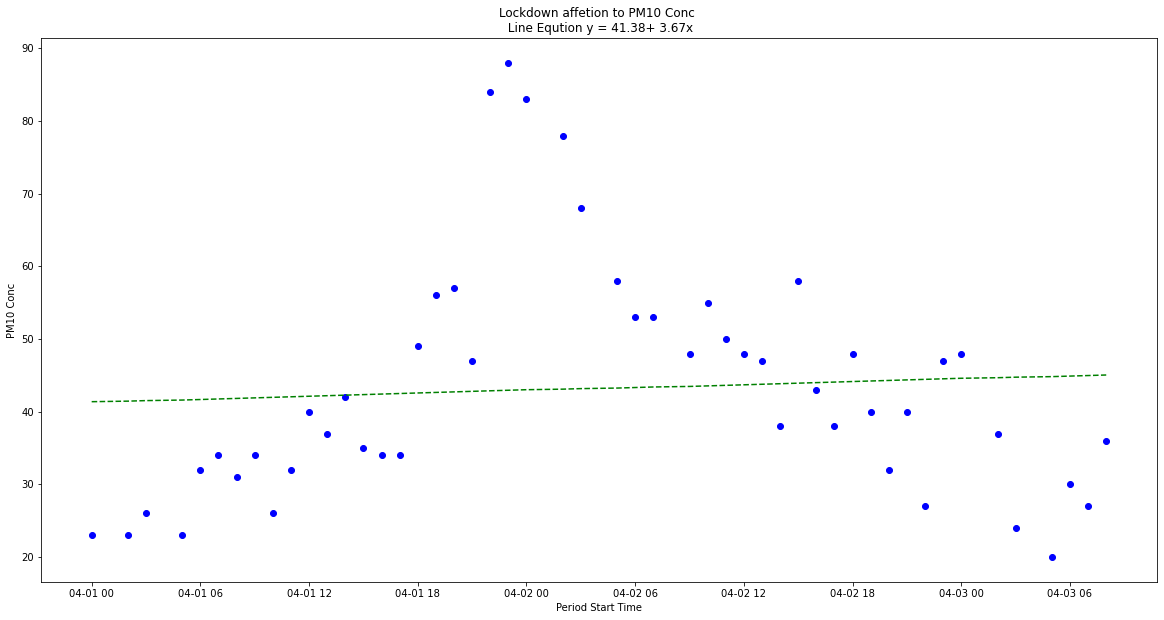

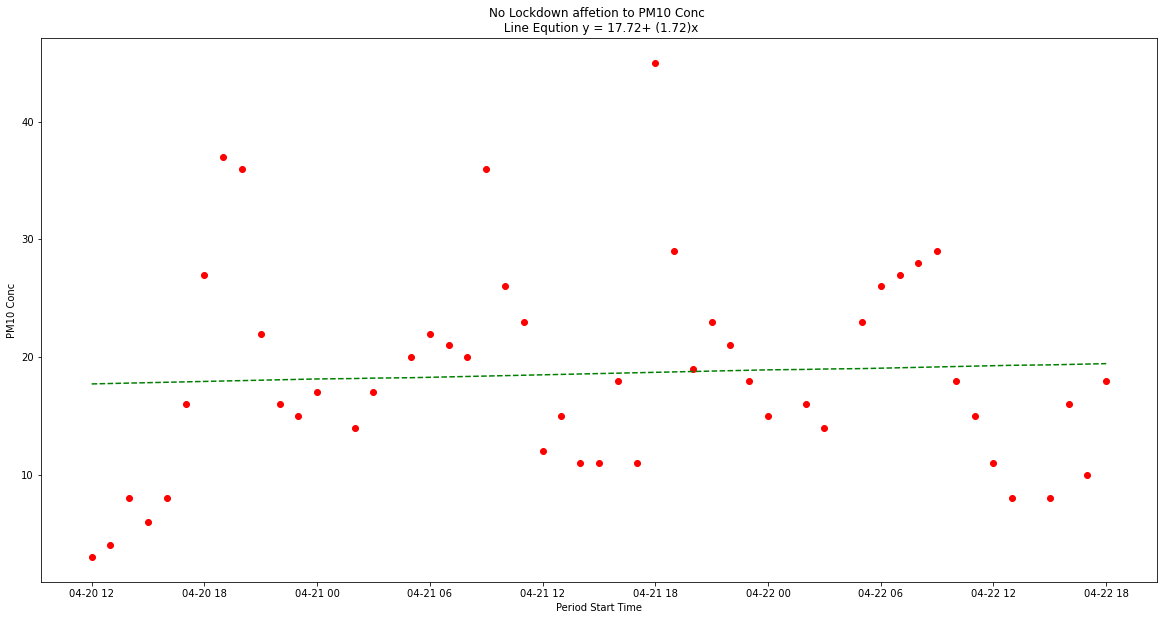

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel("B_Lockdown.xlsx").dropna()
df2 = pd.read_excel("B_No_Lockdown.xlsx").dropna()
parameters = ['O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc','PM10 Conc']

for para in parameters:
    x1_time = df1['Period Start Time']
    x1 = list(x1_time)
    y1 = list(df1[para])
    df1.loc[:, "Period Start Time"] = pd.to_datetime(df1.loc[:, "Period Start Time"], format="%y-%b-%d %H:%M")
    y_values = df1.loc[:, para]
    x_values = np.linspace(0,1,len(df1.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(df1.loc[:, "Period Start Time"], df1.loc[:,para], "bo")
    plt.plot(df1.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"Lockdown affetion to {para} \n Line Eqution y = {round(coeffs[1],2)}+ {round(coeffs[0],2)}x")
    plt.xlabel("Period Start Time")
    plt.ylabel(f"{para}")
    plt.savefig(f"Lockdown affetion to {para}.png")
    plt.show()


    x2 = list(df2['Period Start Time'])
    y2 = list(df2[para])
    df2.loc[:, "Period Start Time"] = pd.to_datetime(df2.loc[:, "Period Start Time"], format="%y-%b-%d %H:%M")
    y_values = df2.loc[:, para]
    x_values = np.linspace(0,1,len(df2.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(df2.loc[:, "Period Start Time"], df2.loc[:,para], "ro")
    plt.plot(df2.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"No Lockdown affetion to {para} \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel("Period Start Time")
    plt.ylabel(f"{para}")
    plt.savefig(f"No Lockdown affetion to {para}.png")
    plt.show()

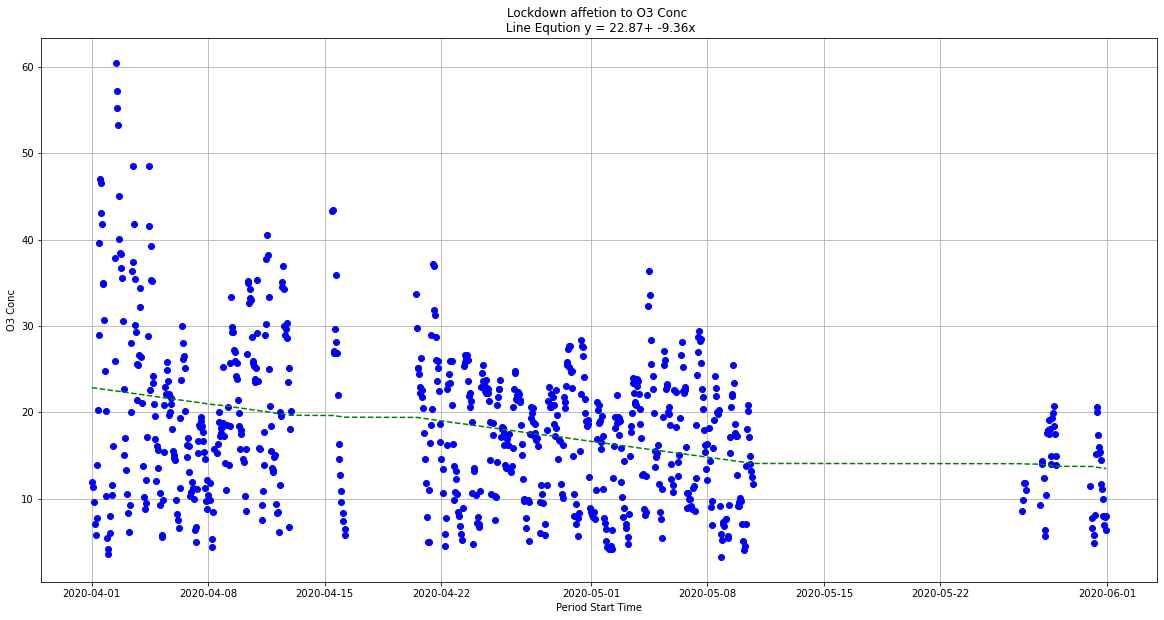

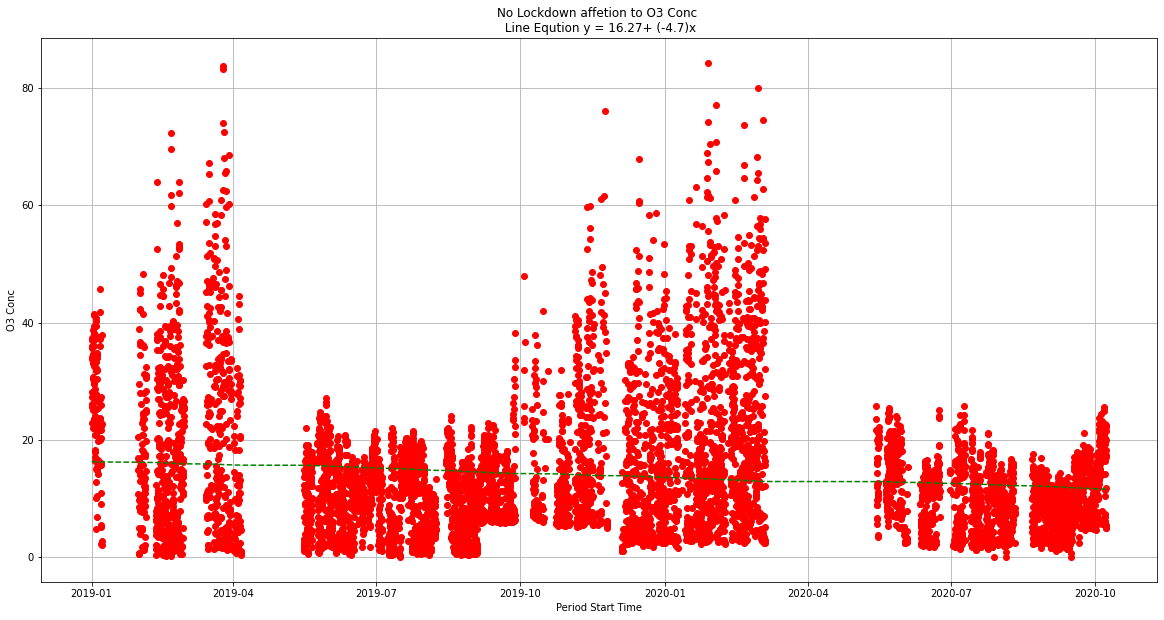

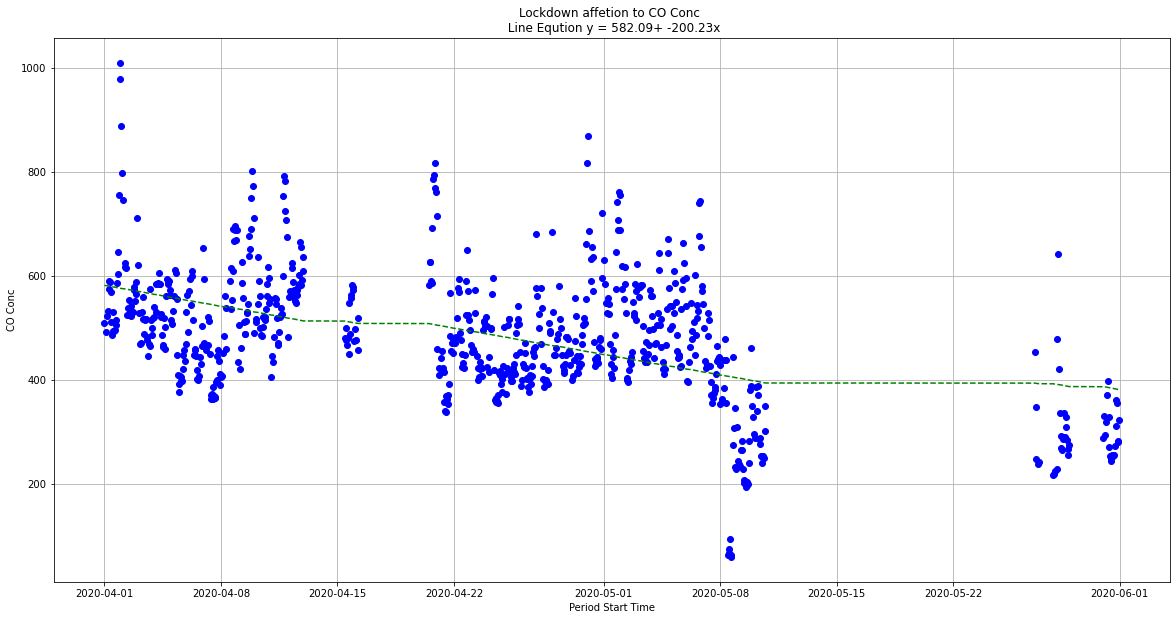

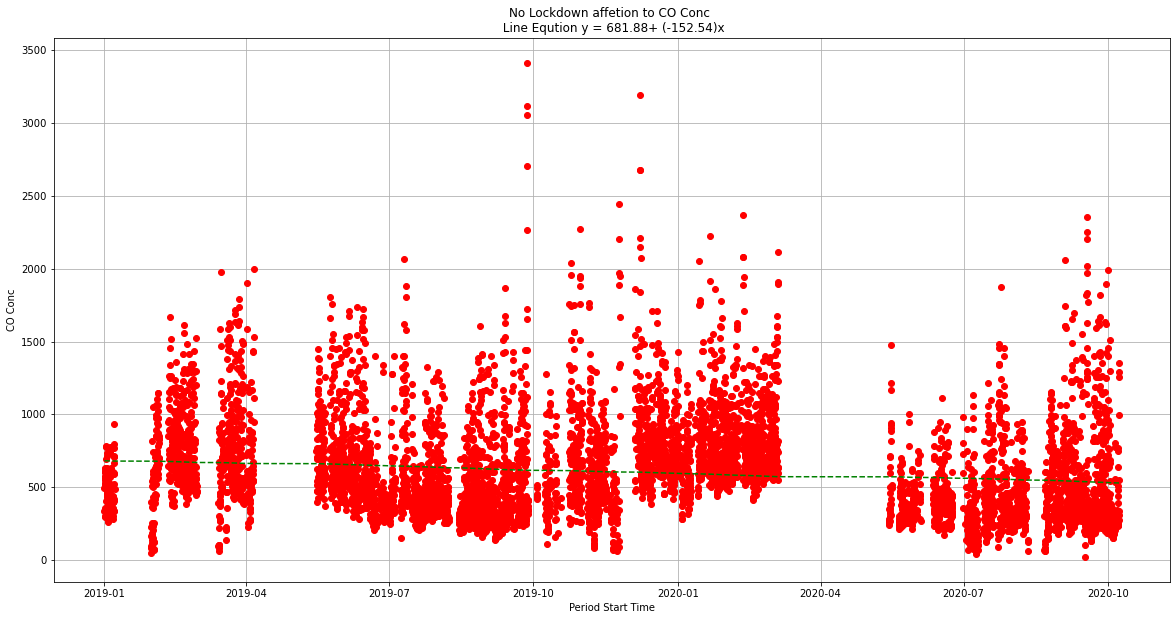

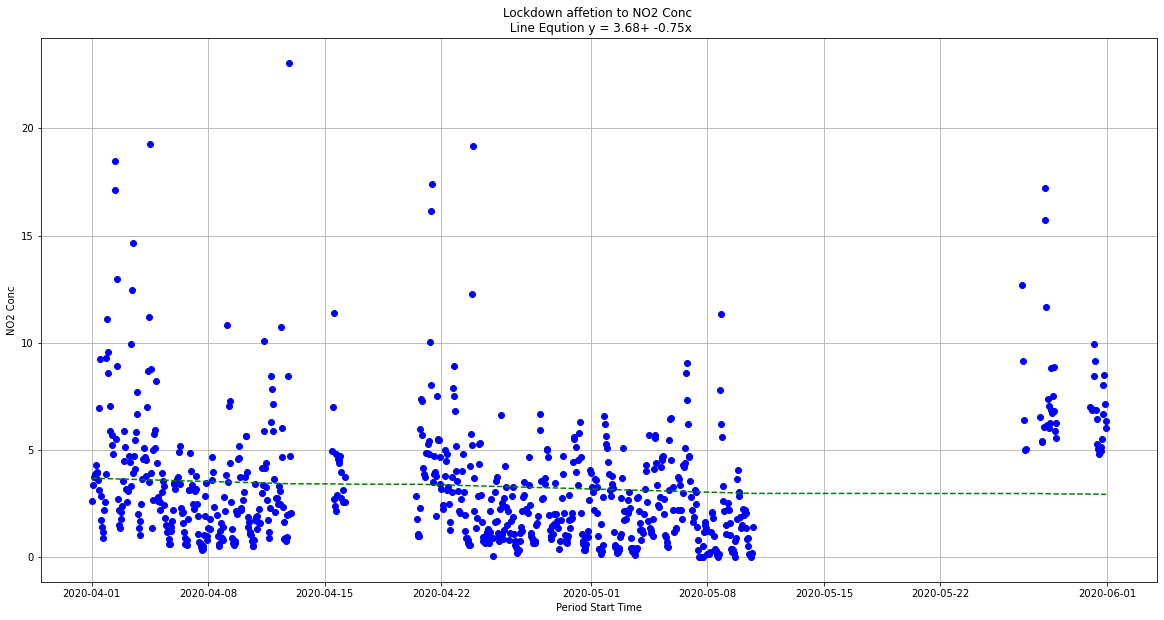

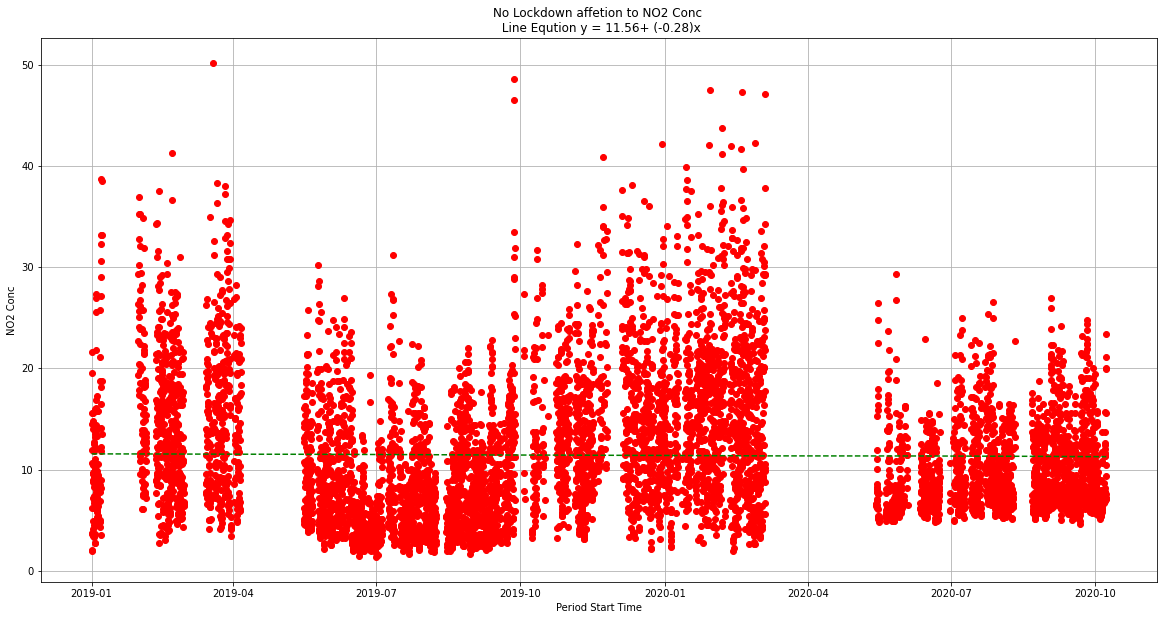

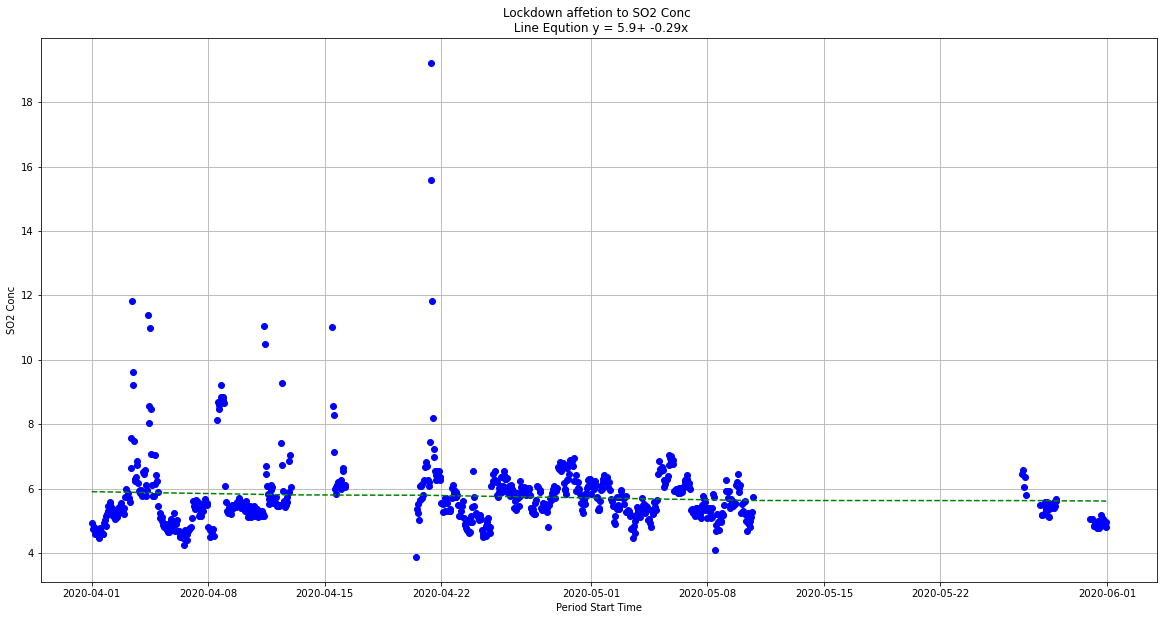

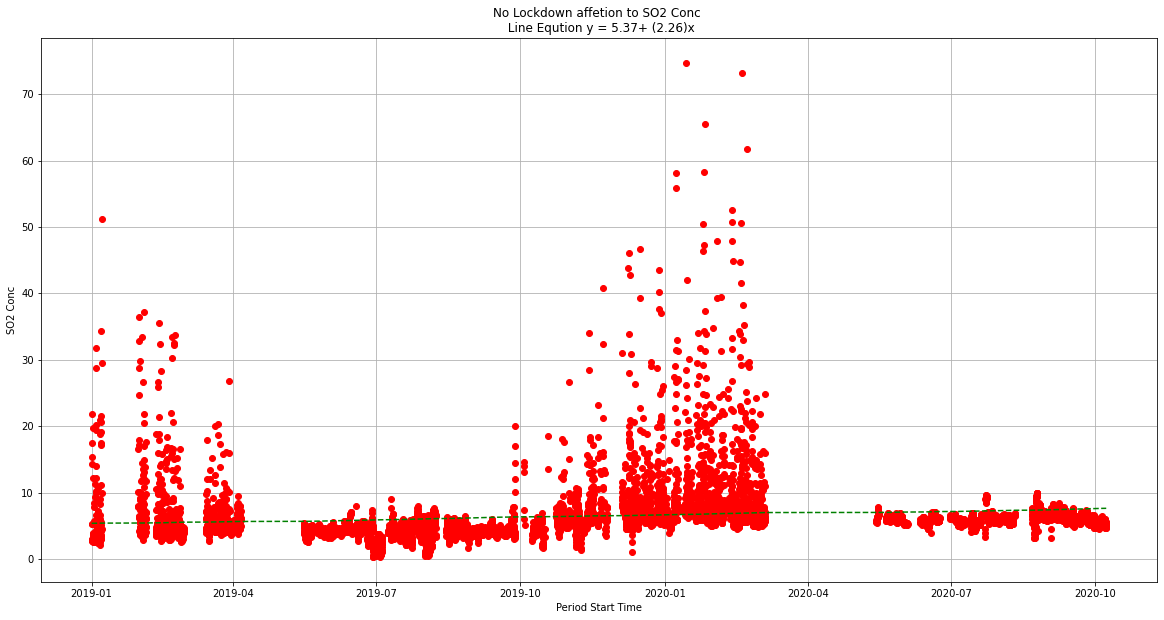

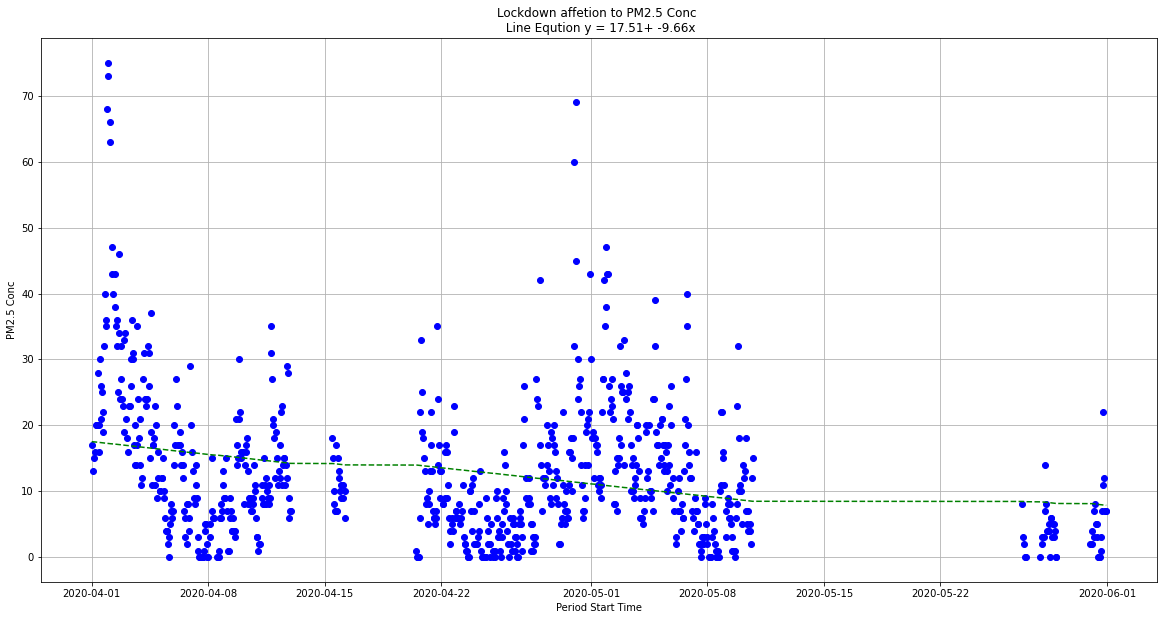

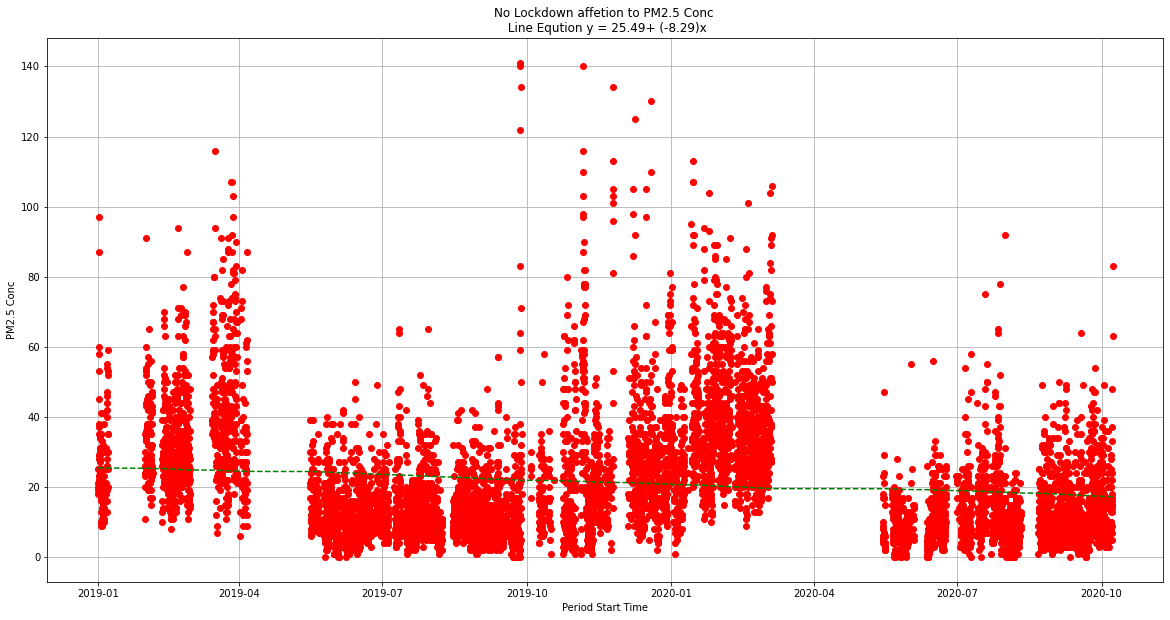

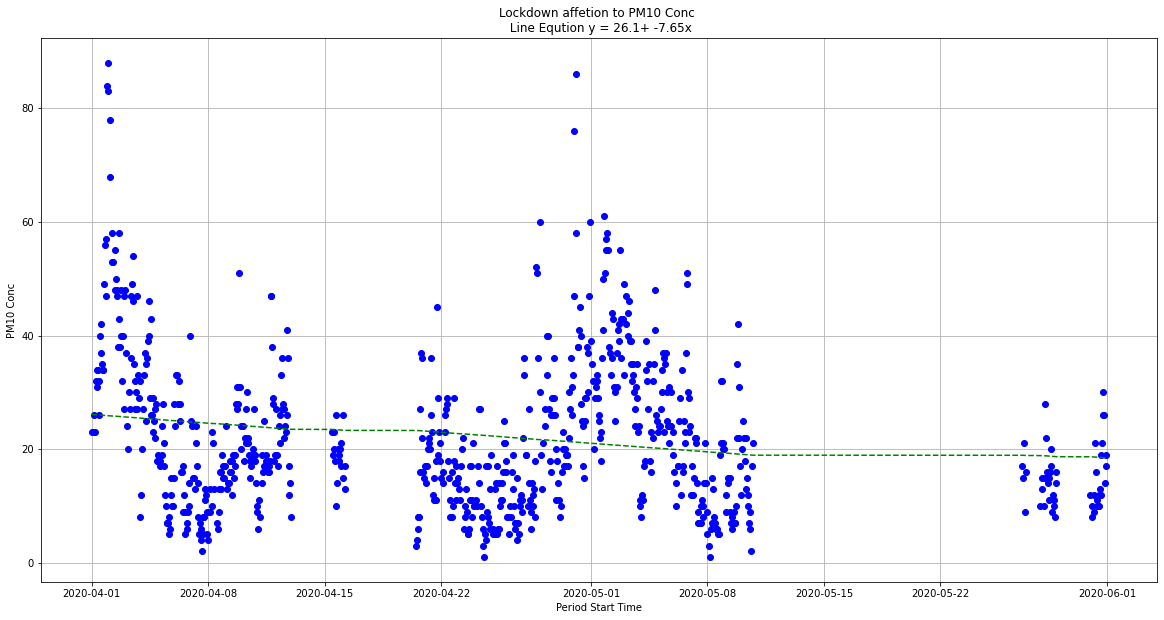

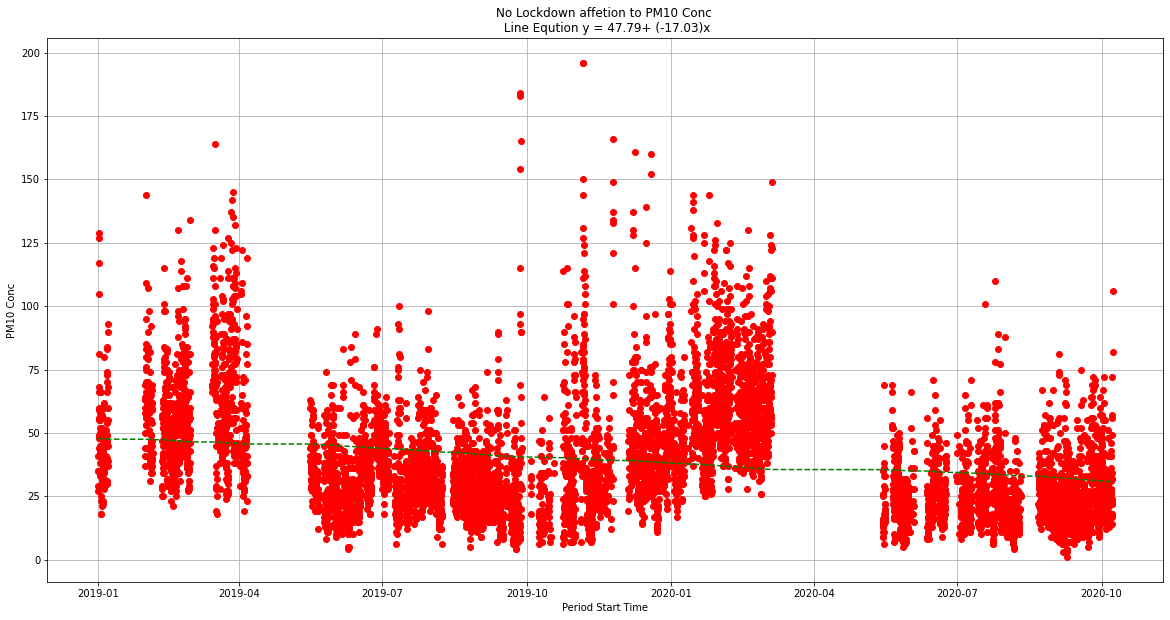

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel("B_Lockdown_new.xlsx").dropna()
df2 = pd.read_excel("B_NLK_AQMS.xlsx").dropna()
parameters = ['O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc','PM10 Conc']

SMALL_SIZE = 19
MEDIUM_SIZE = 19
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

for para in parameters:
    x1_time = df1['Period Start Time']
    x1 = list(x1_time)
    y1 = list(df1[para])
    df1.loc[:, "Period Start Time"] = pd.to_datetime(df1.loc[:, "Period Start Time"], format="%b-%d-%y %H:%M")
    y_values = df1.loc[:, para]
    x_values = np.linspace(0,1,len(df1.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(df1.loc[:, "Period Start Time"], df1.loc[:,para], "bo")
    plt.plot(df1.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"Lockdown affetion to {para} \n Line Eqution y = {round(coeffs[1],2)}+ {round(coeffs[0],2)}x")
    plt.xlabel("Period Start Time")
    plt.ylabel(f"{para}")
    plt.grid()
    plt.savefig(f"Lockdown affetion to {para}.png")
    plt.show()


    x2 = list(df2['Period Start Time'])
    y2 = list(df2[para])
    df2.loc[:, "Period Start Time"] = pd.to_datetime(df2.loc[:, "Period Start Time"], format="%y-%b-%d %H:%M")
    y_values = df2.loc[:, para]
    x_values = np.linspace(0,1,len(df2.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(df2.loc[:, "Period Start Time"], df2.loc[:,para], "ro")
    plt.plot(df2.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"No Lockdown affetion to {para} \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel("Period Start Time")
    plt.ylabel(f"{para}")
    plt.grid()
    plt.savefig(f"No Lockdown affetion to {para}.png")
    plt.show()

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


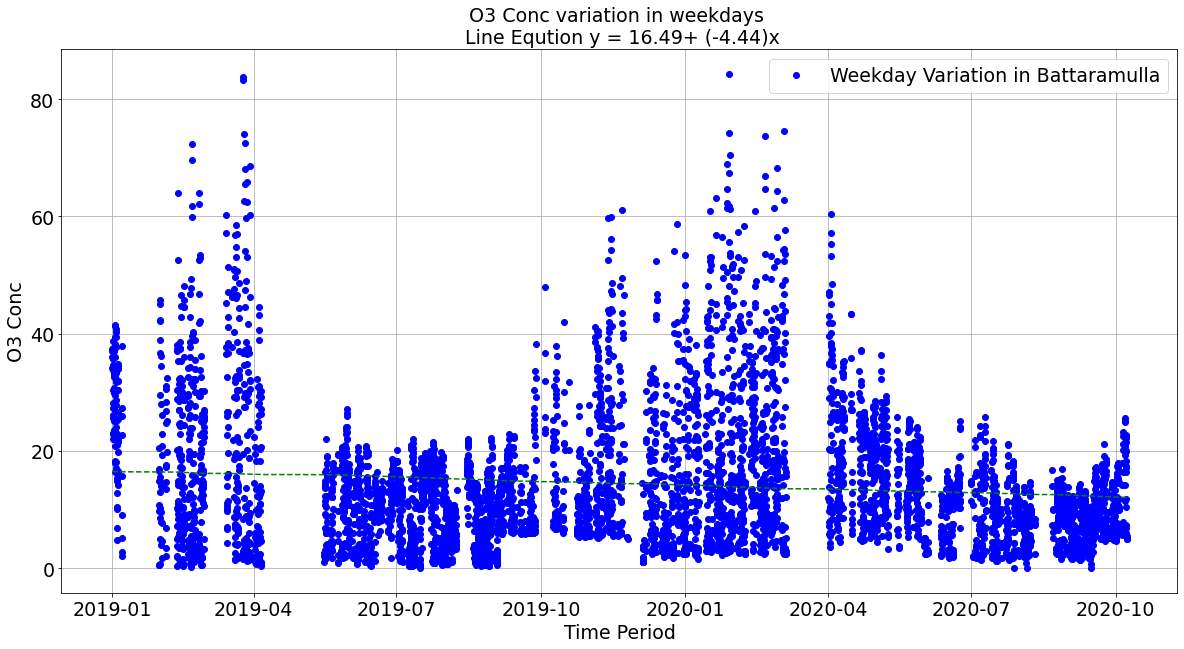

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


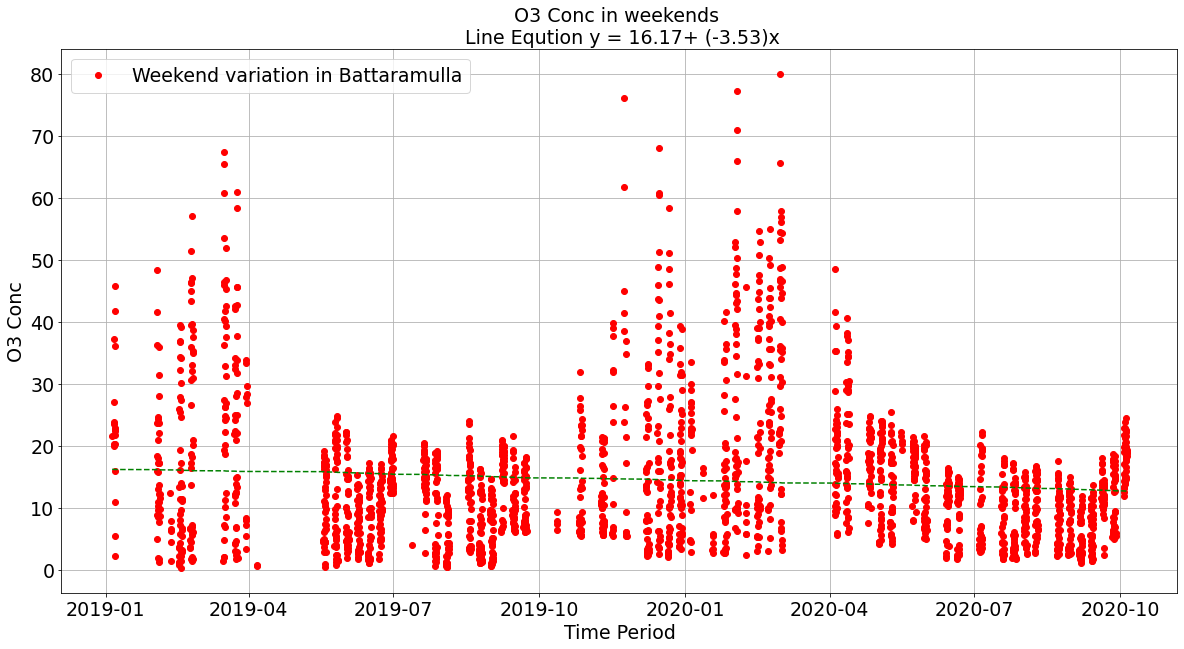

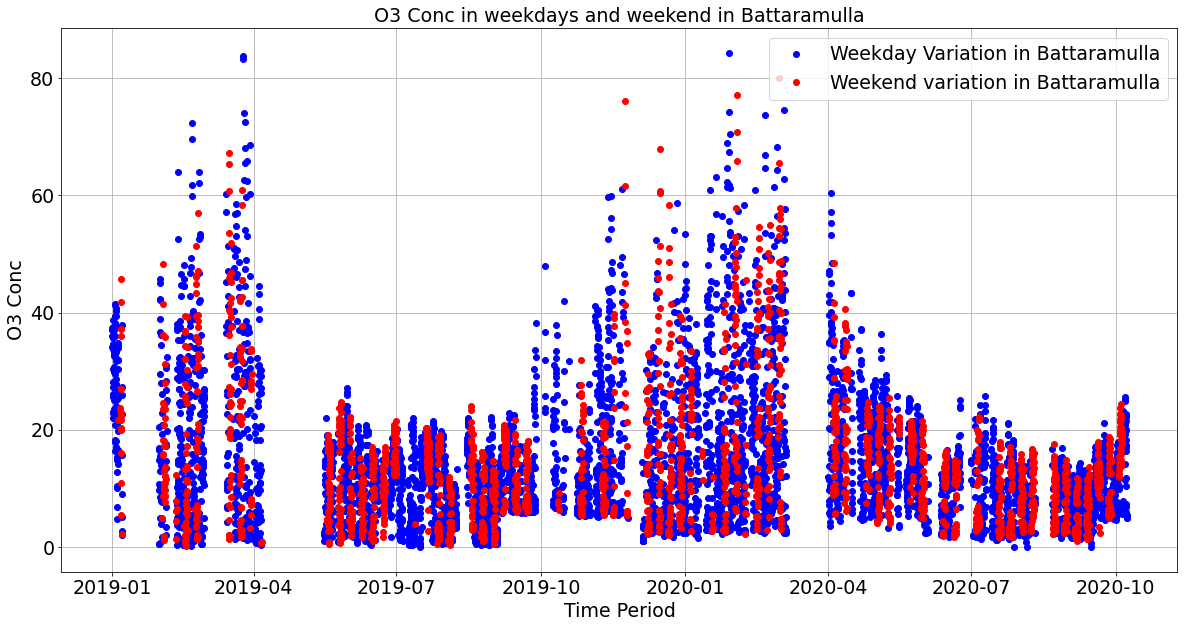

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


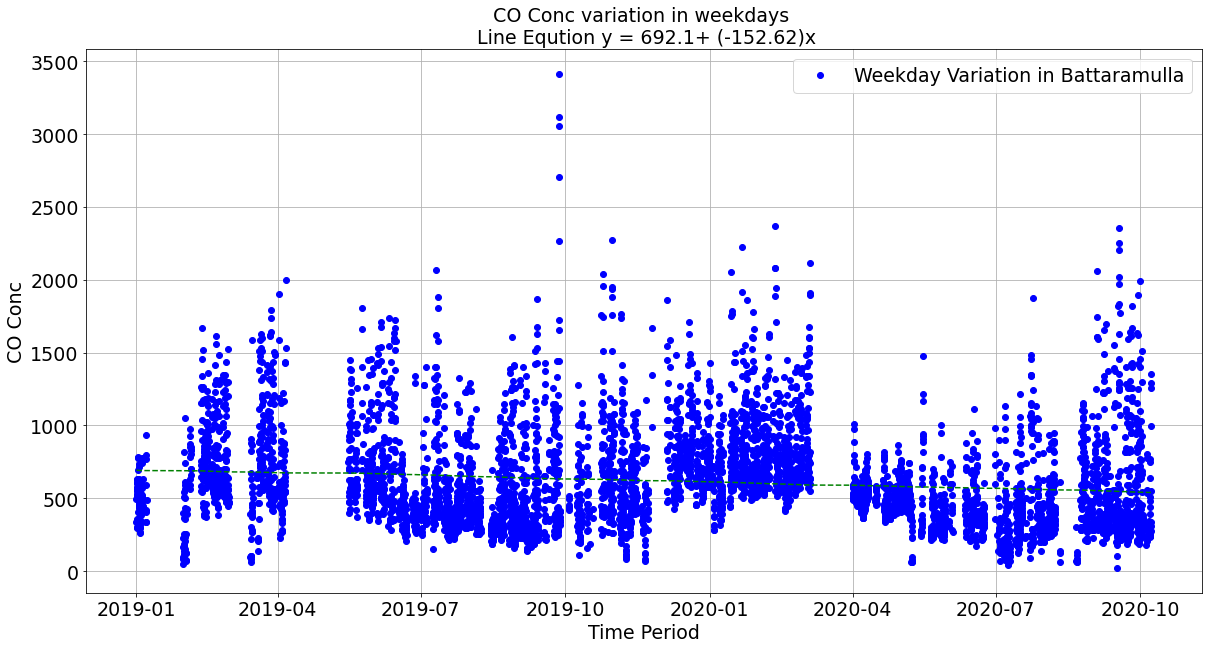

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


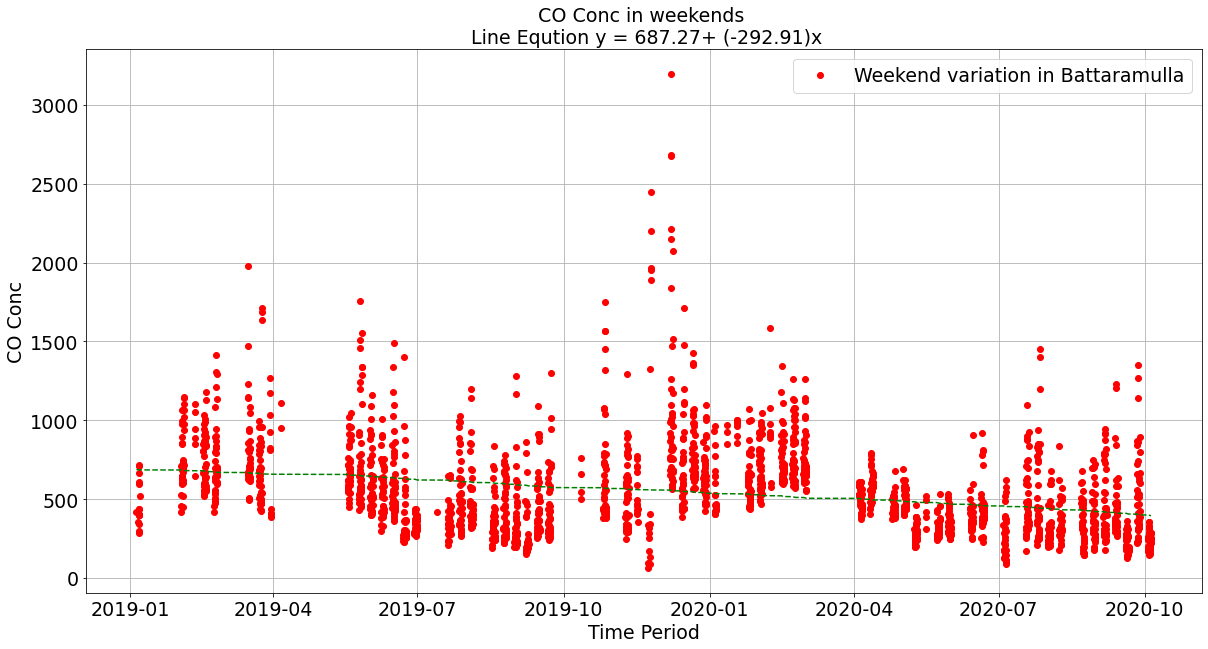

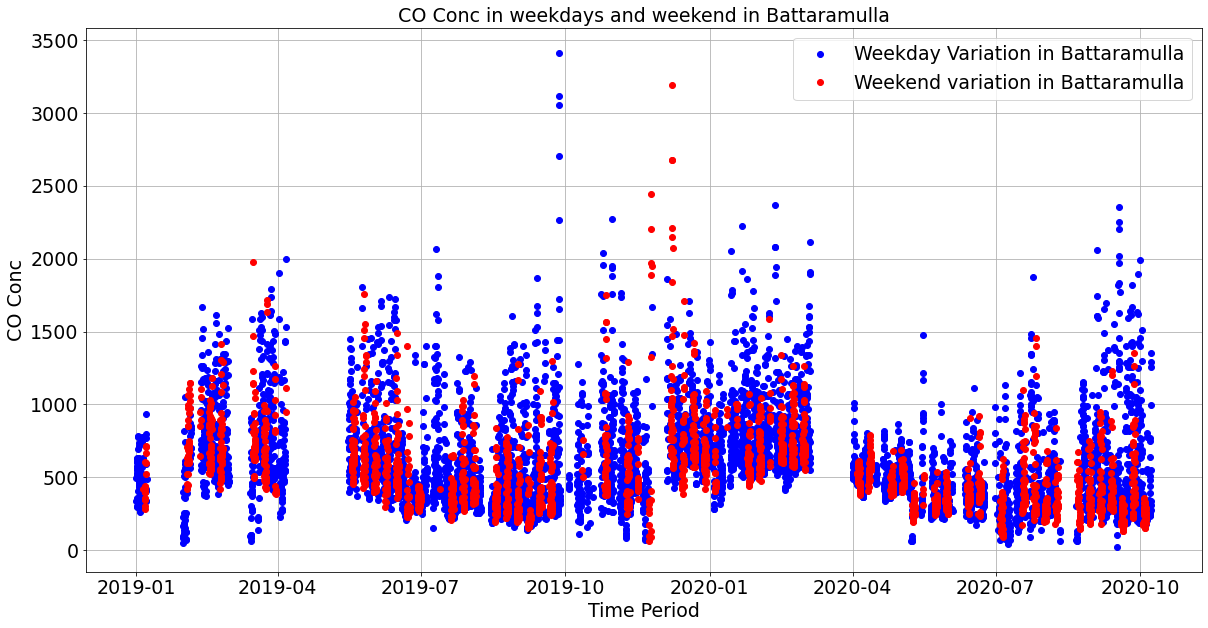

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


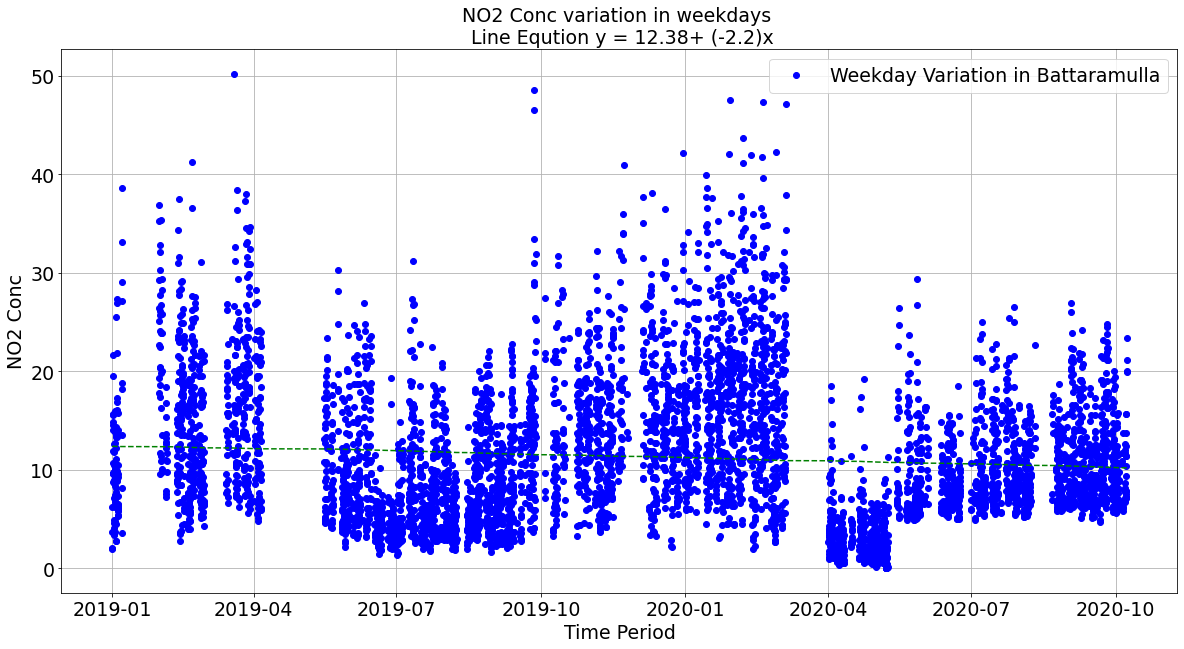

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


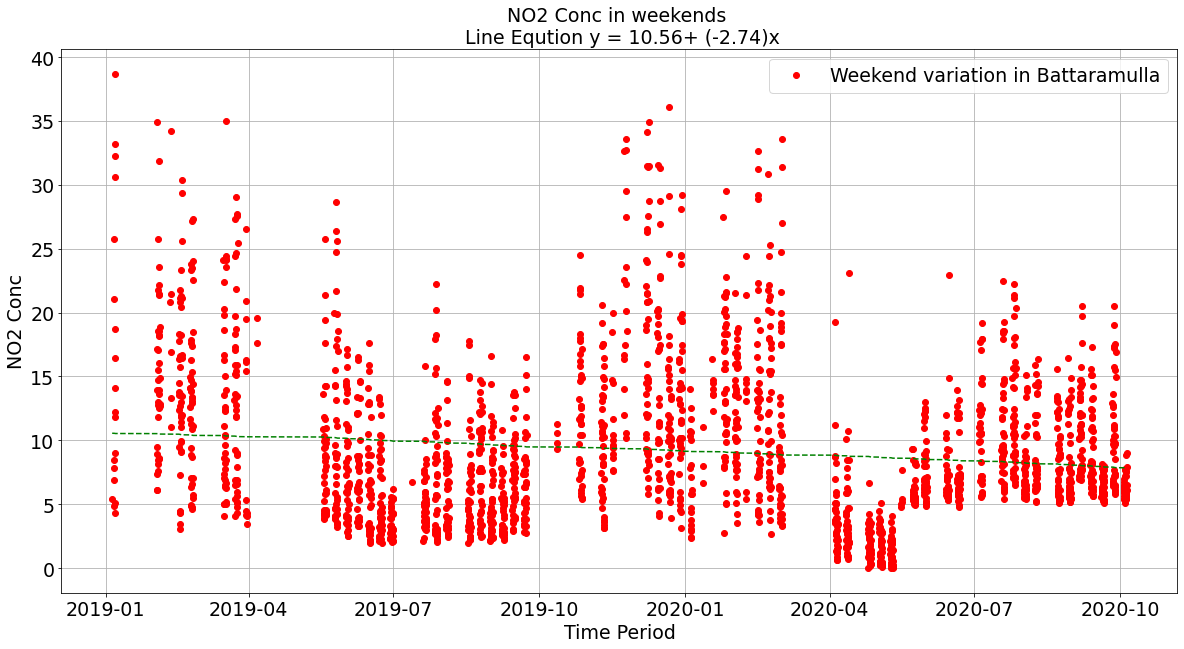

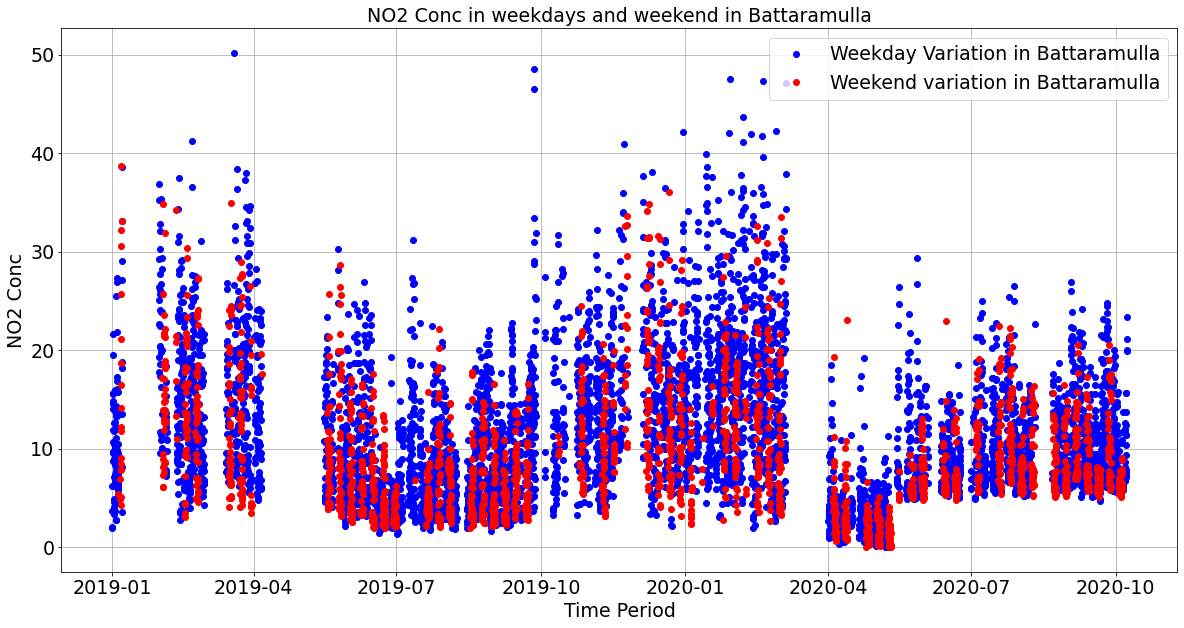

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


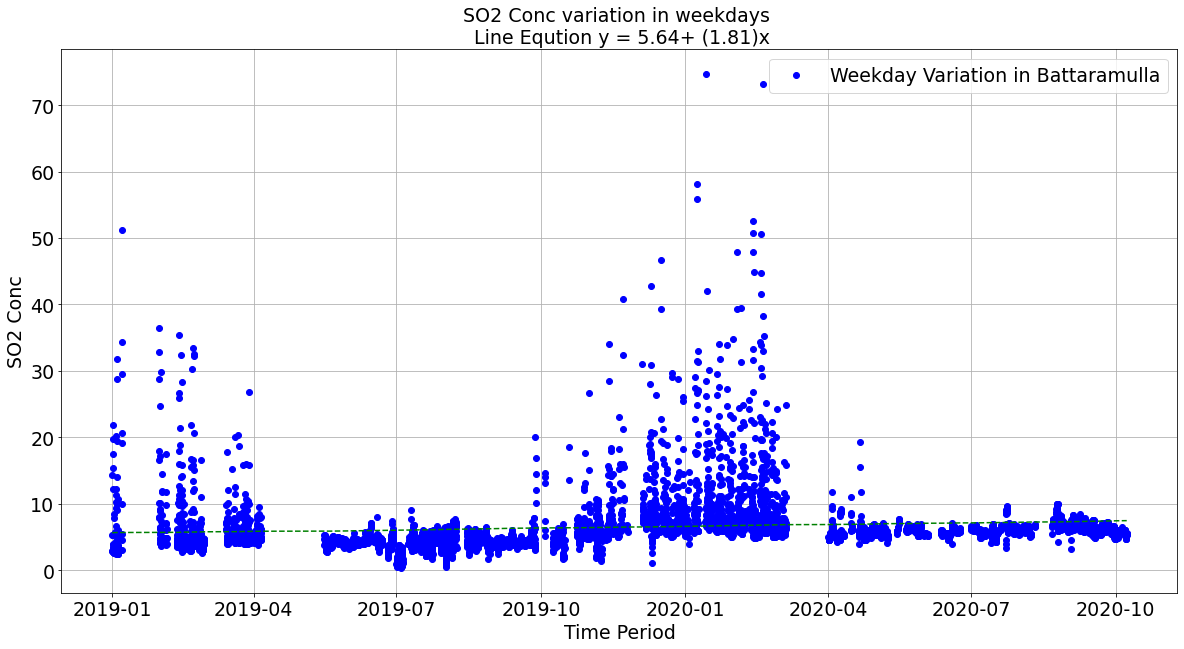

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


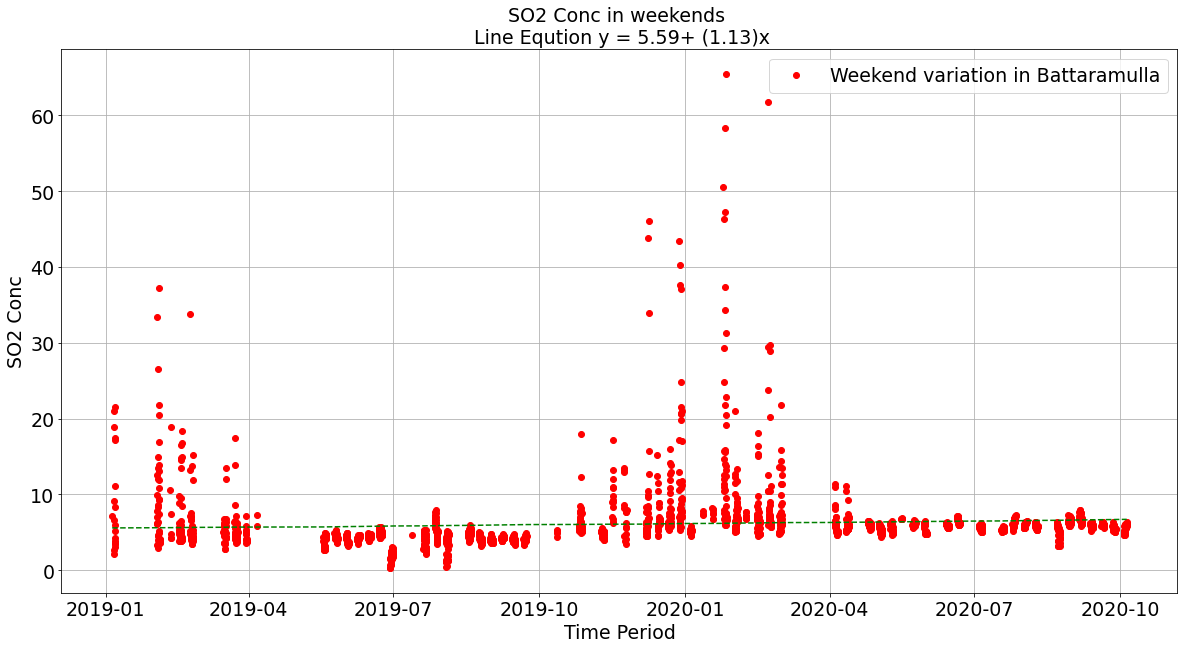

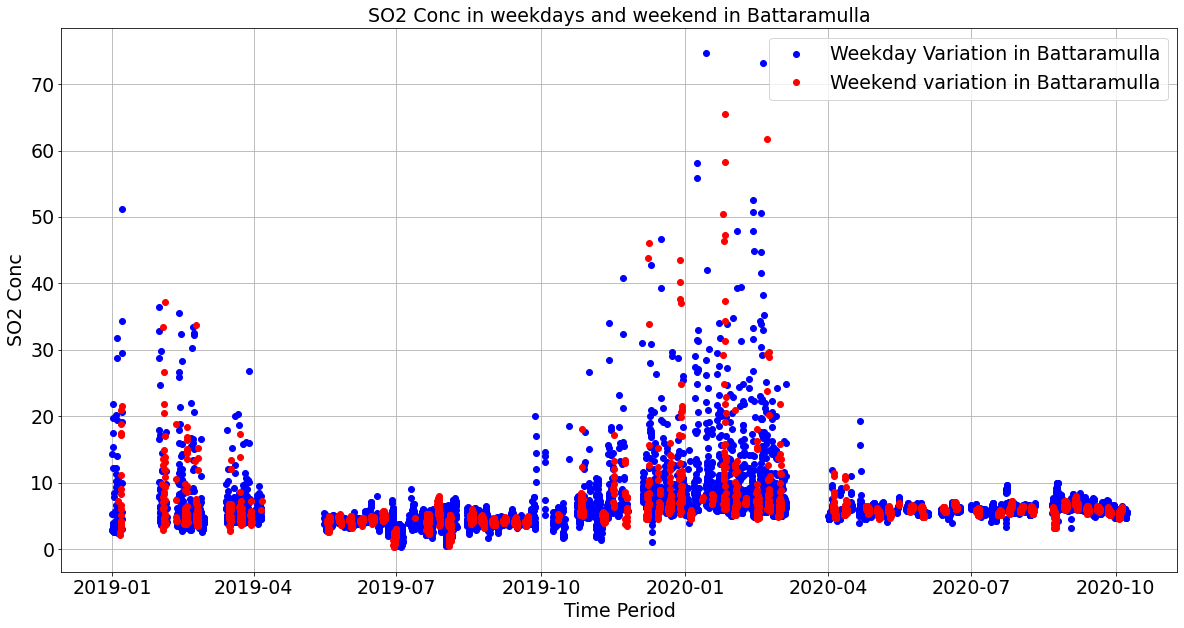

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


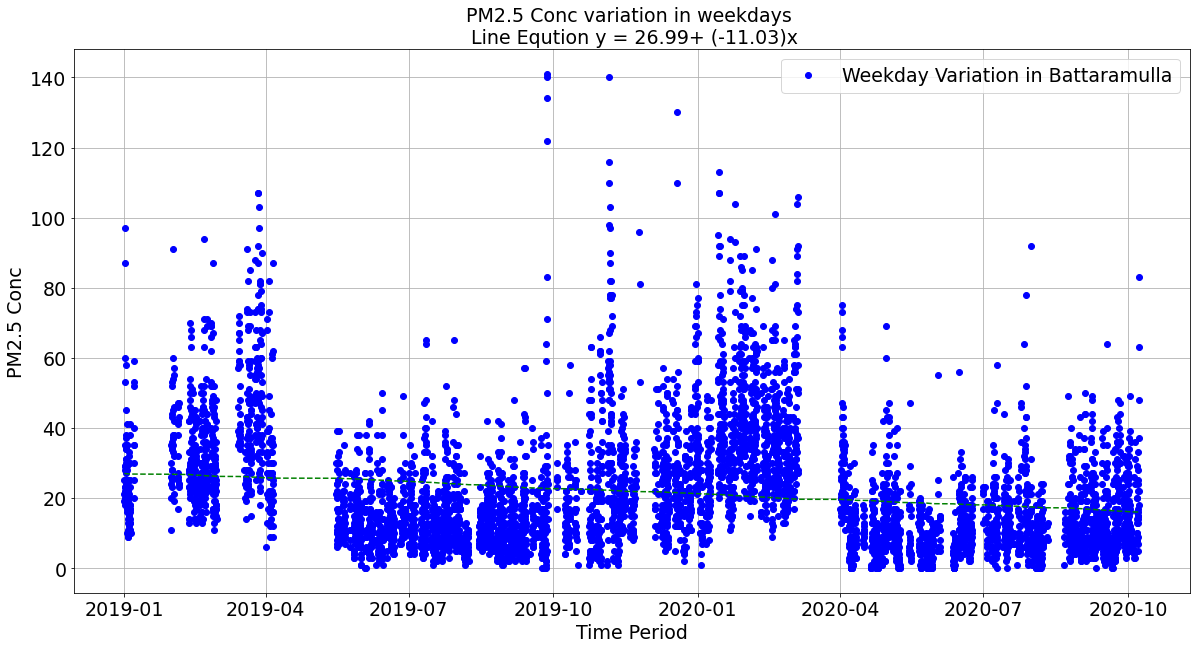

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


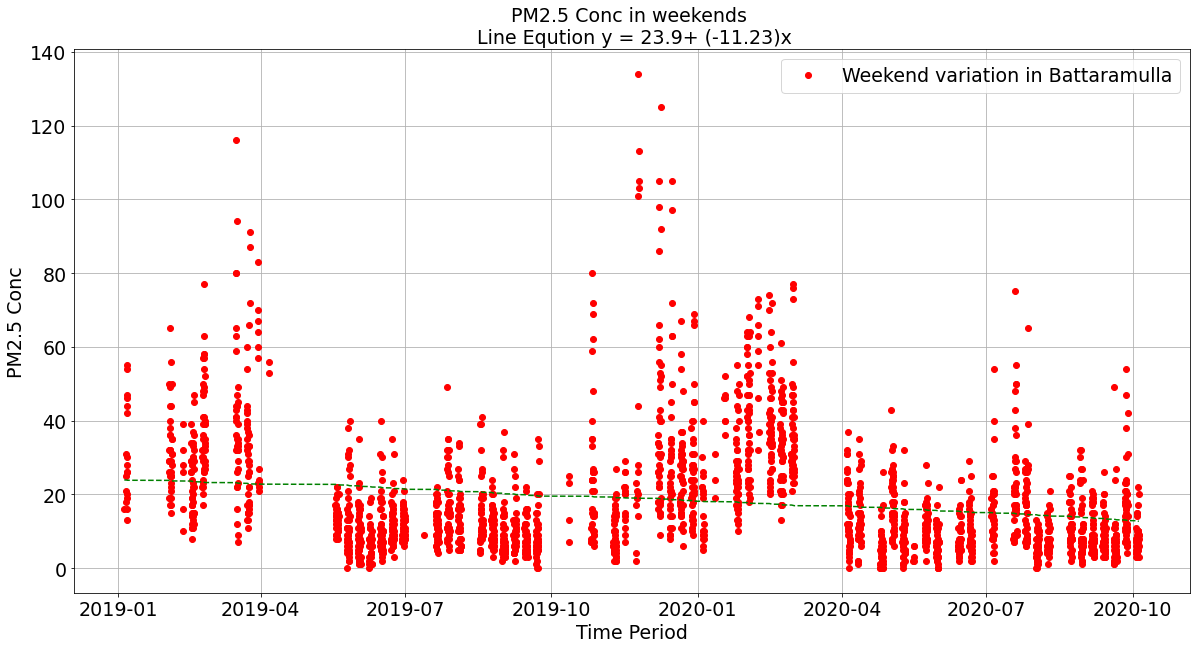

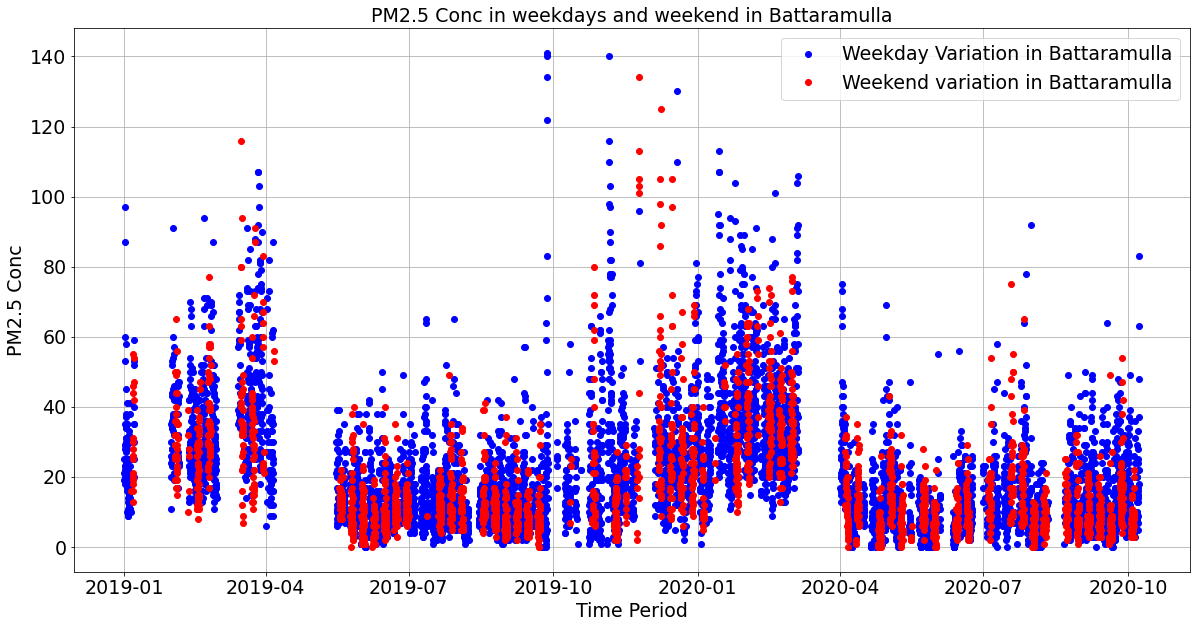

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


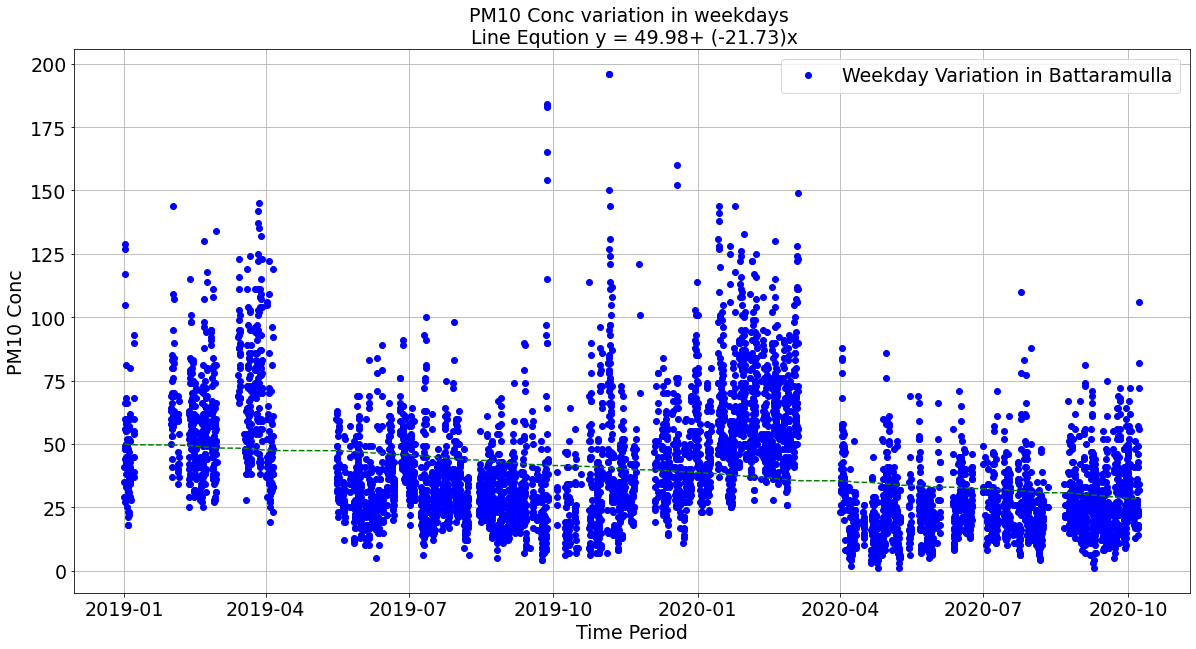

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


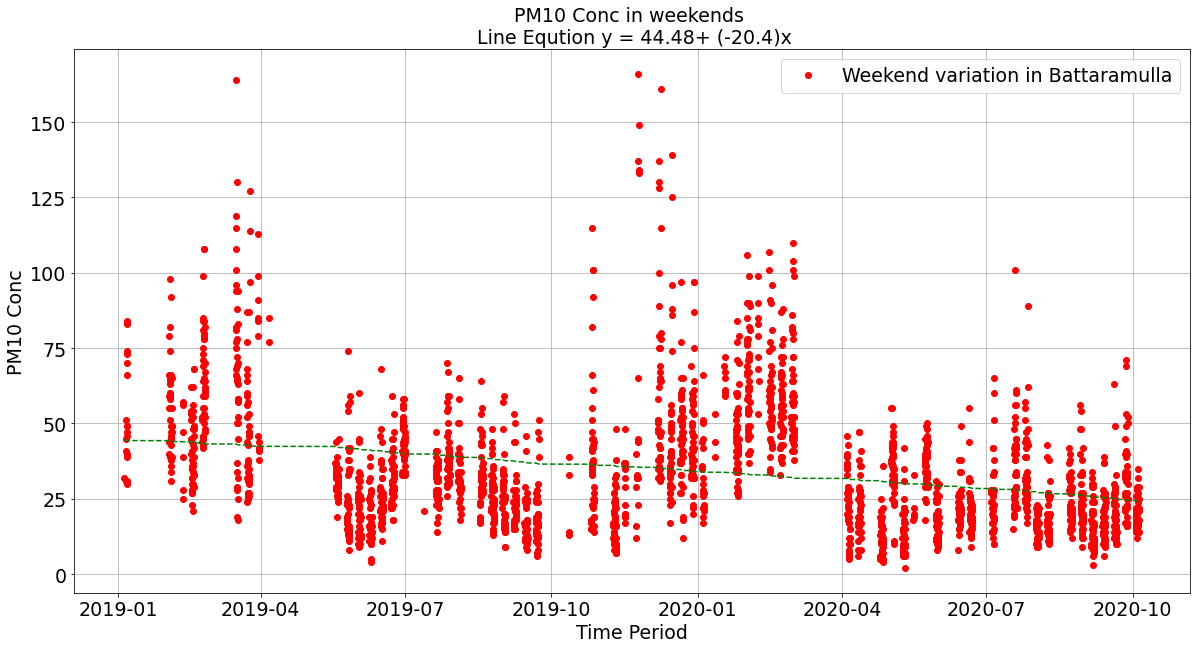

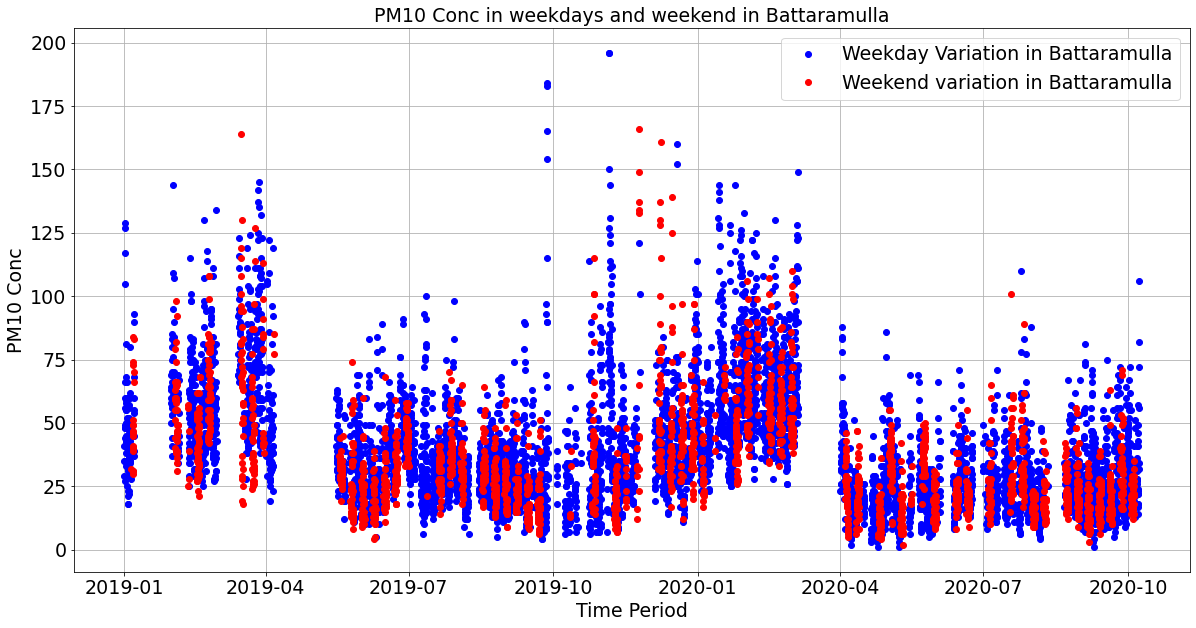

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 19
MEDIUM_SIZE = 19
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

df3 = pd.read_excel("Battaramulla_new.xlsx").dropna()
workday= df3[df3["Date"] == 'Workday']
weekend= df3[df3["Date"] == 'Weekend']
parameters = ['O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc','PM10 Conc']
for para in parameters:
    workday.loc[:, "Period Start Time"] = pd.to_datetime(workday.loc[:, "Period Start Time"], format="%y-%b-%d %H:%M")
    values = range(len(workday.loc[:, "Period Start Time"]))
    y_values = workday.loc[:, para]
    x_values = np.linspace(0,1,len(workday.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(workday.loc[:, "Period Start Time"], workday.loc[:,para], "bo",label='Weekday Variation in Battaramulla')
    plt.plot(workday.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"{para} variation in weekdays \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel("Time Period")
    plt.ylabel(f"{para}")
    plt.grid()
    plt.legend()
    plt.savefig(f"Battaramulla/{para} variation in weekdays in Battaramulla.png")
    plt.show()
    
    weekend.loc[:, "Period Start Time"] = pd.to_datetime(weekend.loc[:, "Period Start Time"], format="%y-%b-%d %H:%M")
    values = range(len(weekend.loc[:, "Period Start Time"]))
    y_values = weekend.loc[:, para]
    x_values = np.linspace(0,1,len(weekend.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(weekend.loc[:, "Period Start Time"], weekend.loc[:,para], "ro",label='Weekend variation in Battaramulla')
    plt.plot(weekend.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"{para} in weekends \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel("Time Period")
    plt.ylabel(f"{para}")
    plt.grid()
    plt.legend()
    plt.savefig(f"Battaramulla/{para} in weekends in Battaramulla.png")
    plt.show()
    
    plt.figure(figsize=(20,10))
    plt.plot(workday.loc[:, 'Period Start Time'], workday.loc[:,para], "bo",label='Weekday Variation in Battaramulla')
    plt.plot(weekend.loc[:, 'Period Start Time'], weekend.loc[:,para], "ro",label='Weekend variation in Battaramulla')
    plt.xlabel("Time Period")
    plt.ylabel(f"{para}")
    plt.title(f"{para} in weekdays and weekend in Battaramulla")
    plt.legend()
    plt.grid()
    plt.savefig(f"Battaramulla/{para} in weekdays and weekend in Battaramulla.png")
    plt.show()


C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


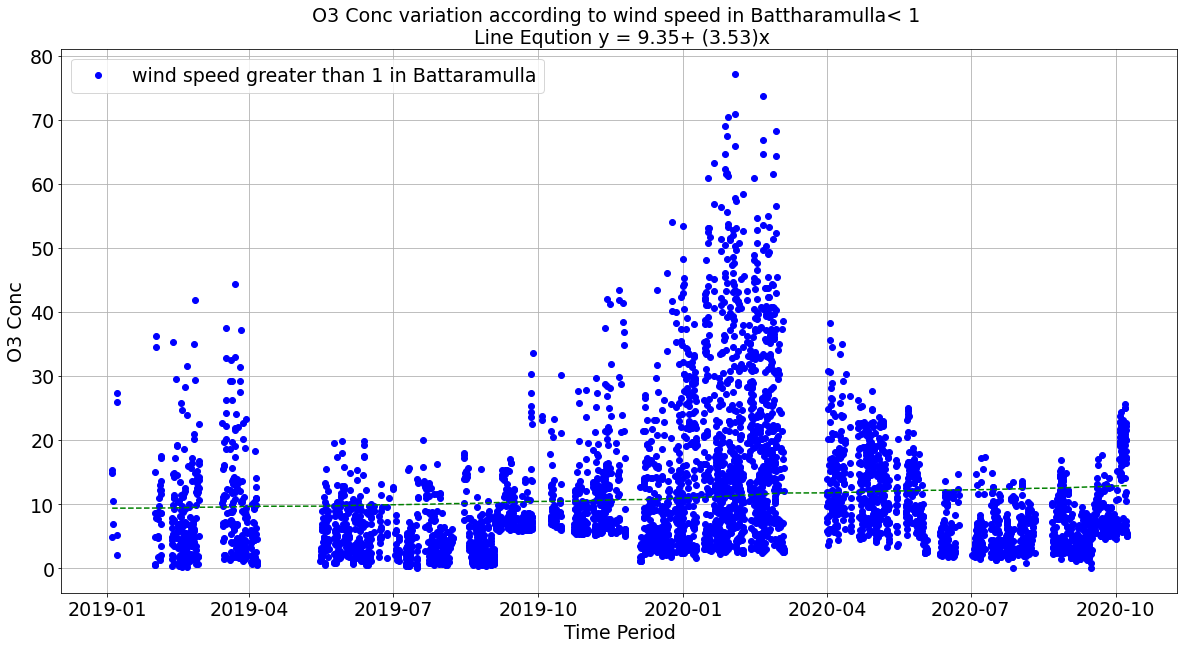

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


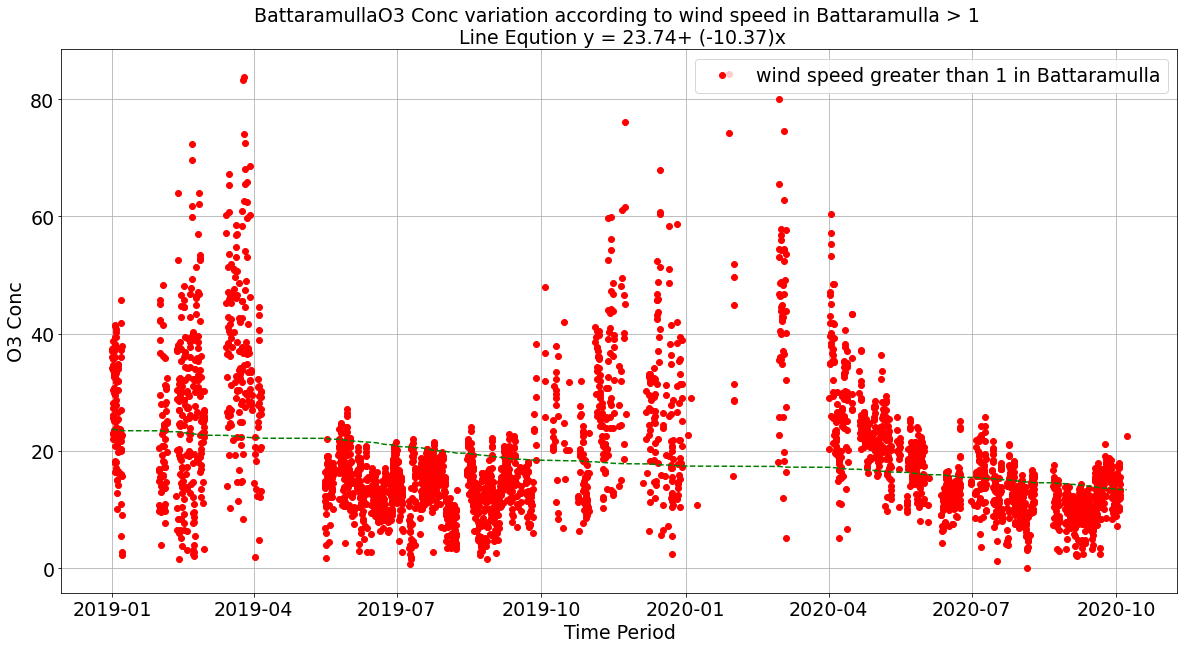

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


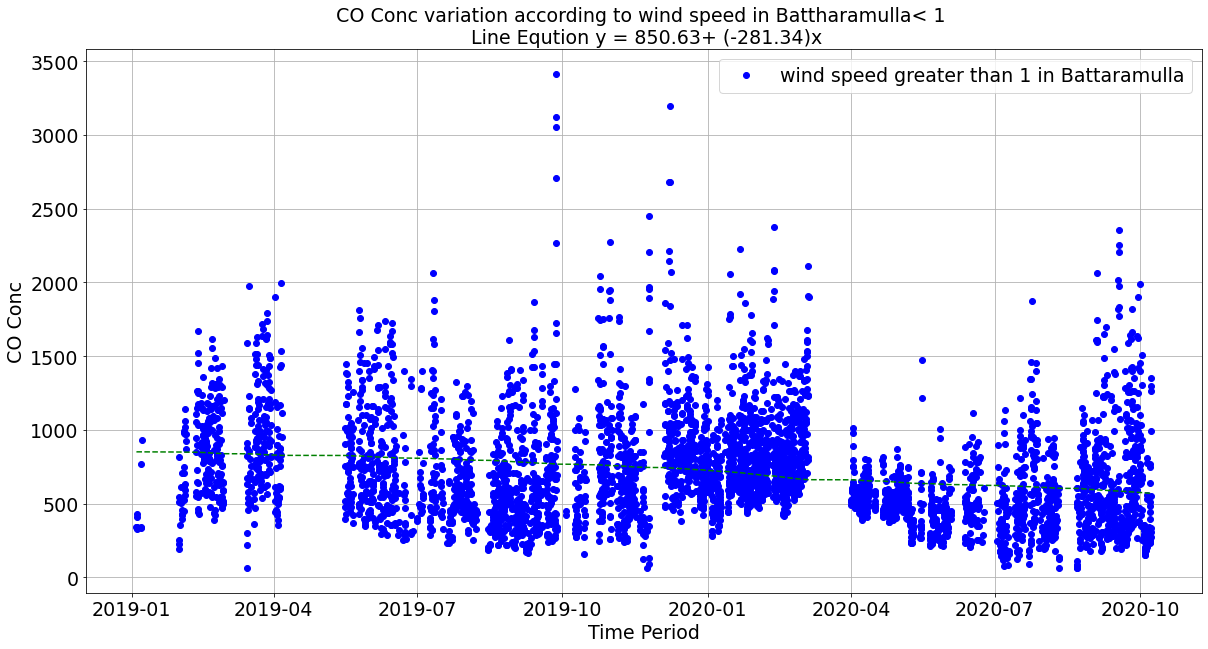

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


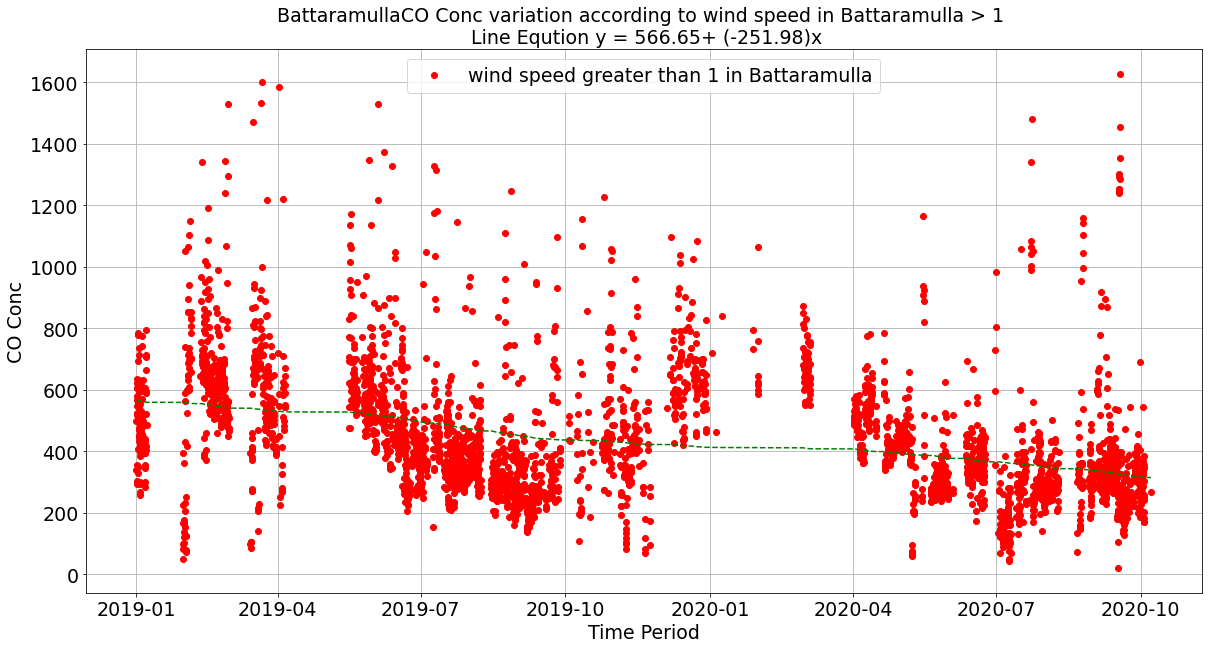

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


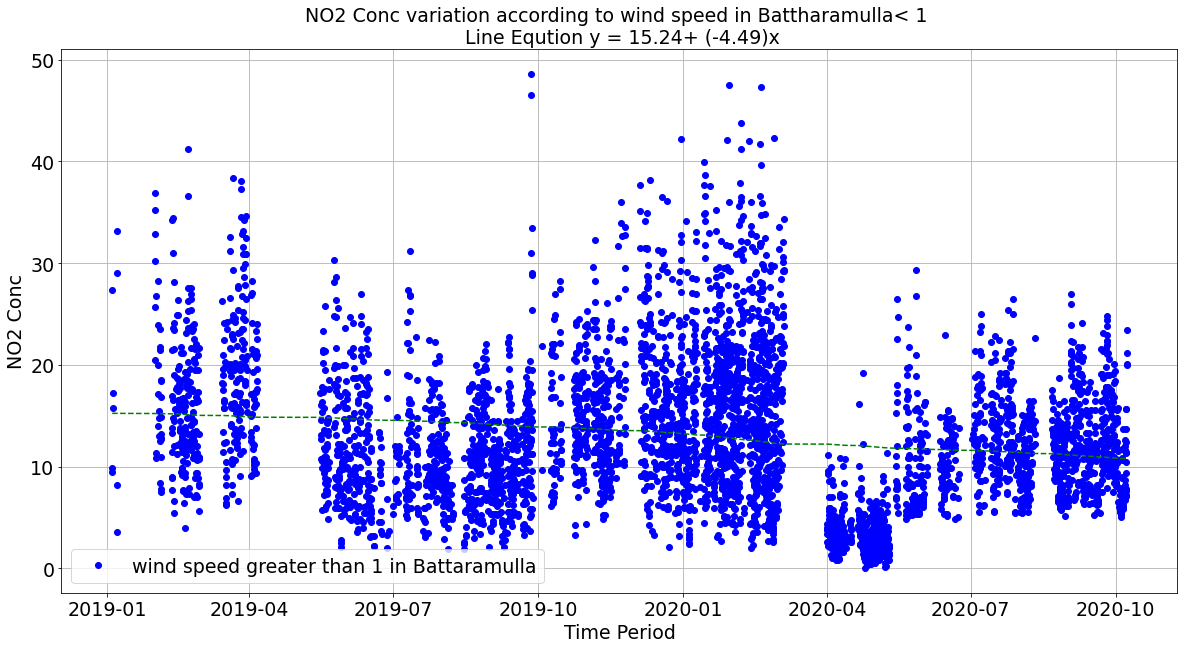

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


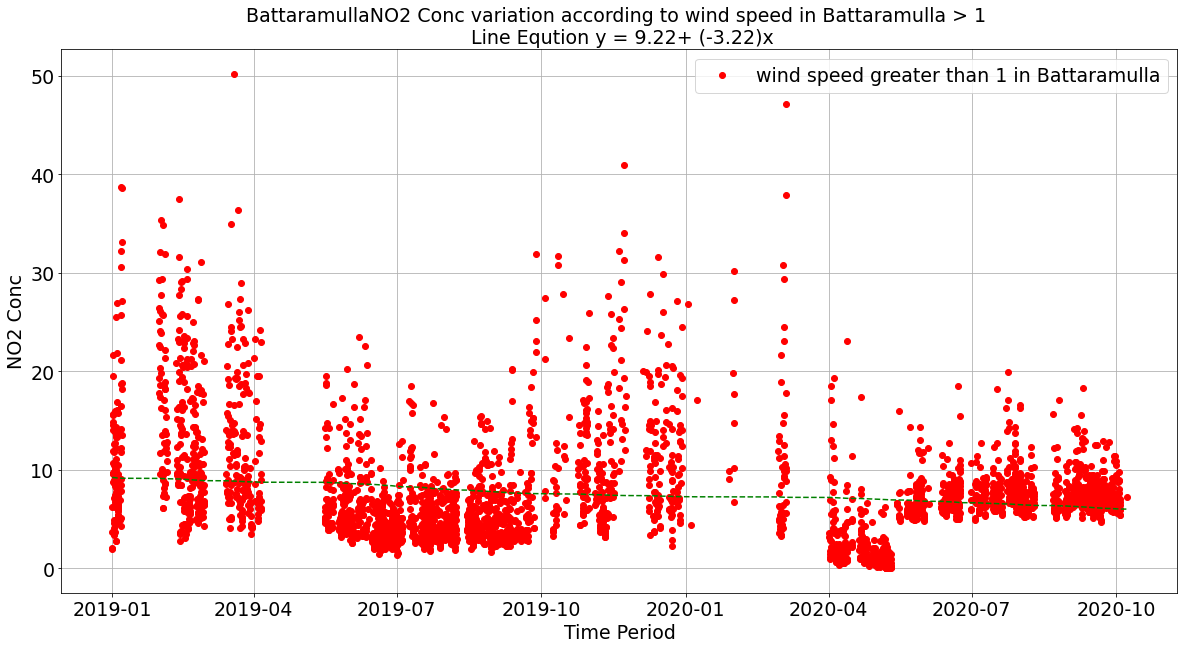

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


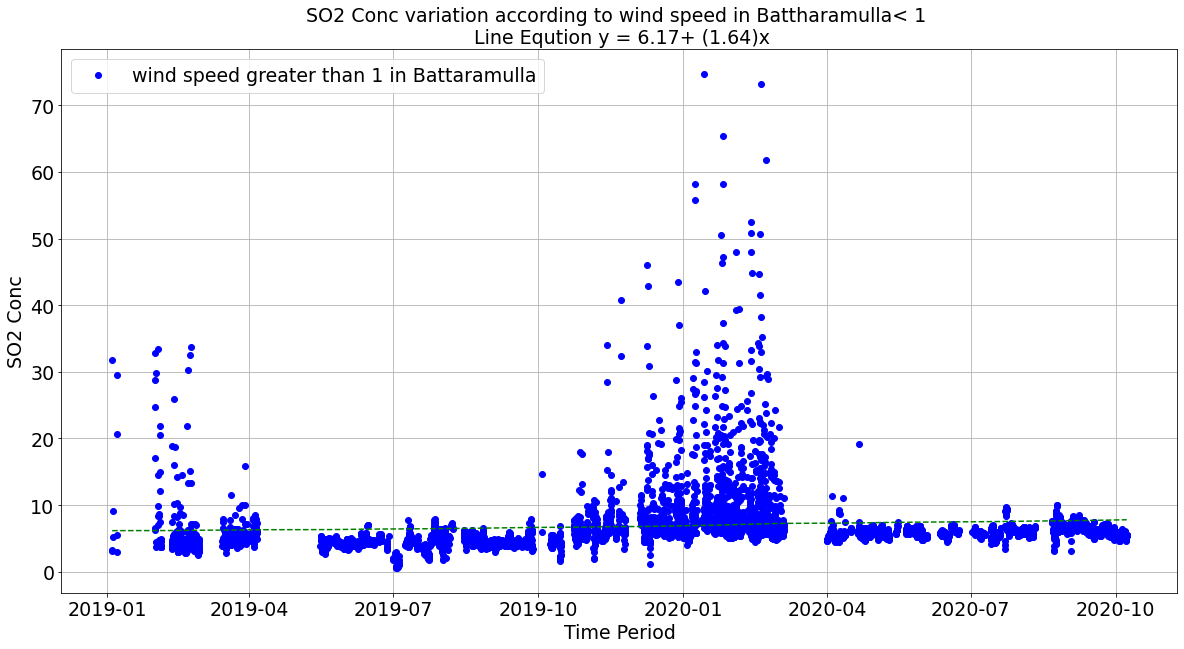

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


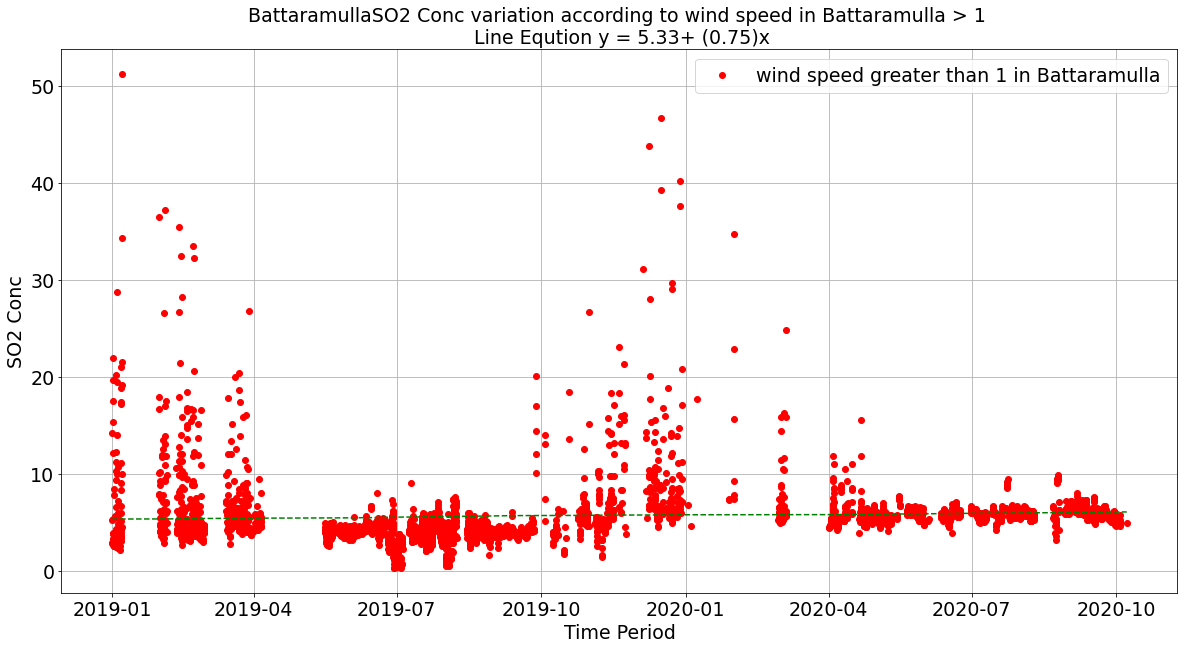

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


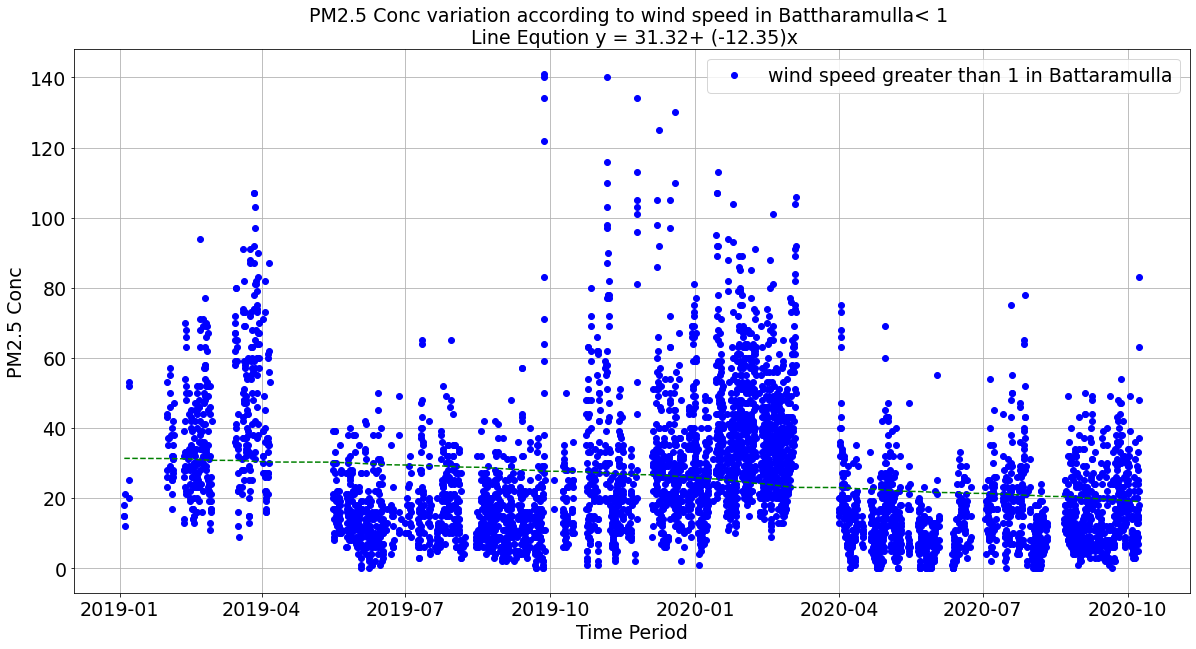

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


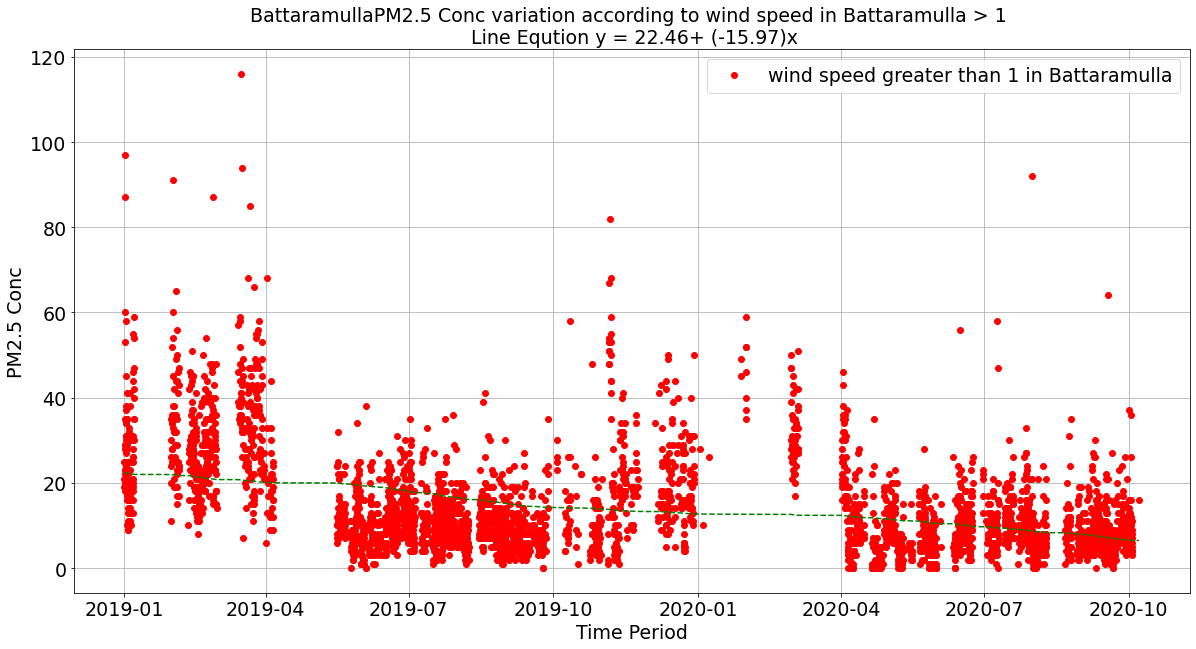

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


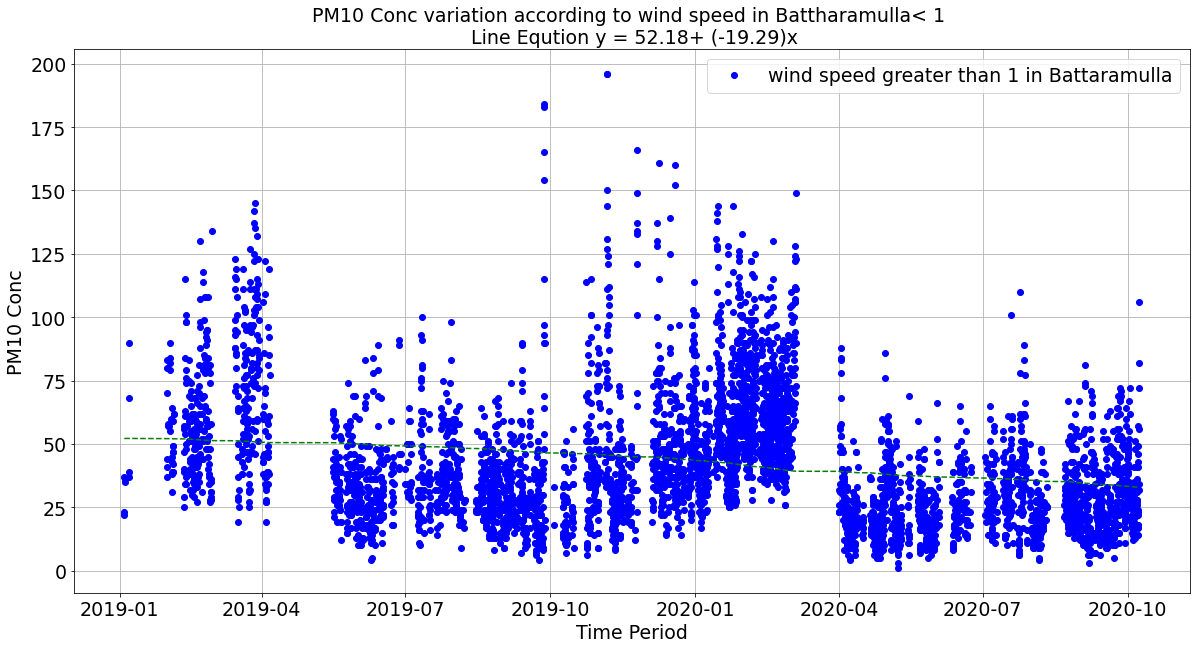

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


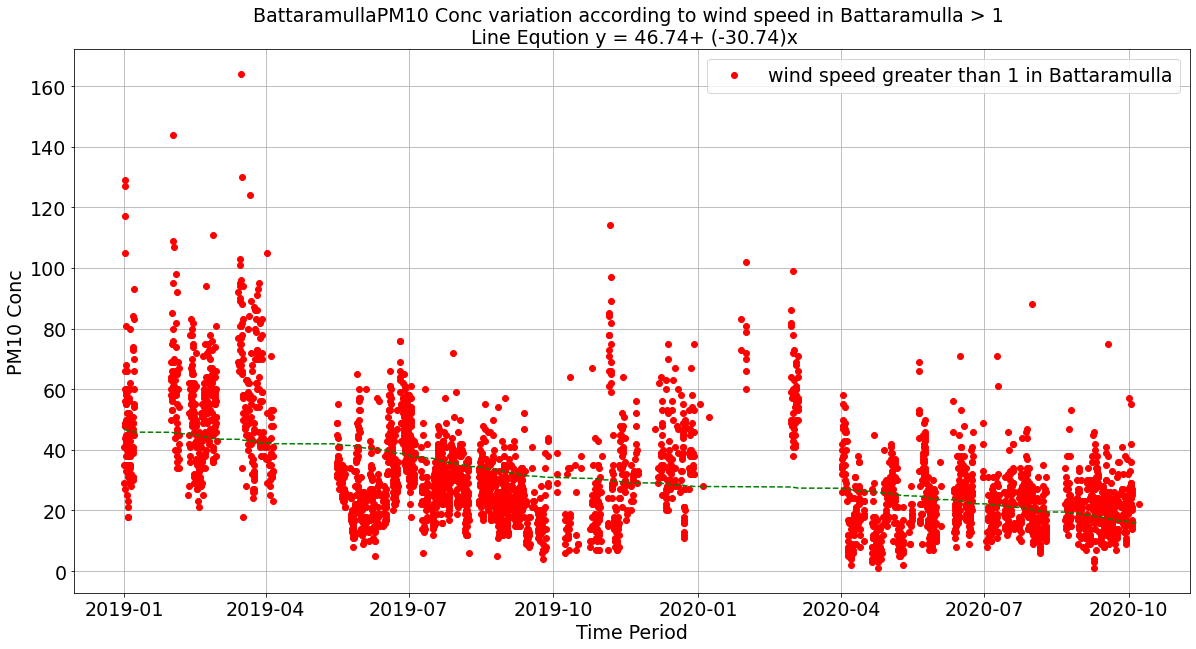

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df3 = pd.read_excel("Battaramulla_new.xlsx").dropna()
low_wind= df3[df3["WS Raw"] <=1]
high_wind= df3[df3["WS Raw"] >1]
parameters = ['O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc','PM10 Conc']
SMALL_SIZE = 19
MEDIUM_SIZE = 19
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
for para in parameters:
    low_wind.loc[:, "Period Start Time"] = pd.to_datetime(low_wind.loc[:, "Period Start Time"], format="%y-%b-%d %H:%M")
    values = range(len(low_wind.loc[:, "Period Start Time"]))
    y_values = low_wind.loc[:, para]
    x_values = np.linspace(0,1,len(low_wind.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(low_wind.loc[:, "Period Start Time"], low_wind.loc[:,para], "bo",label='wind speed greater than 1 in Battaramulla')
    plt.plot(low_wind.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"{para} variation according to wind speed in Battharamulla< 1 \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel("Time Period")
    plt.ylabel(f"{para}")
    plt.grid()
    plt.legend()
    plt.savefig(f"Battaramulla/{para} variation according to wind speed less than 1 in Battaramulla.png")
    plt.show()

    high_wind.loc[:, "Period Start Time"] = pd.to_datetime(high_wind.loc[:, "Period Start Time"], format="%y-%b-%d %H:%M")
    values = range(len(high_wind.loc[:, "Period Start Time"]))
    y_values = high_wind.loc[:, para]
    x_values = np.linspace(0,1,len(high_wind.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(high_wind.loc[:, "Period Start Time"], high_wind.loc[:,para], "ro",label='wind speed greater than 1 in Battaramulla')
    plt.plot(high_wind.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"Battaramulla{para} variation according to wind speed in Battaramulla > 1 \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel("Time Period")
    plt.ylabel(f"{para}")
    plt.grid()
    plt.legend()
    plt.savefig(f"Battaramulla{para} variation according to wind speed greater than 1 in Battaramulla.png")
    plt.show()

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


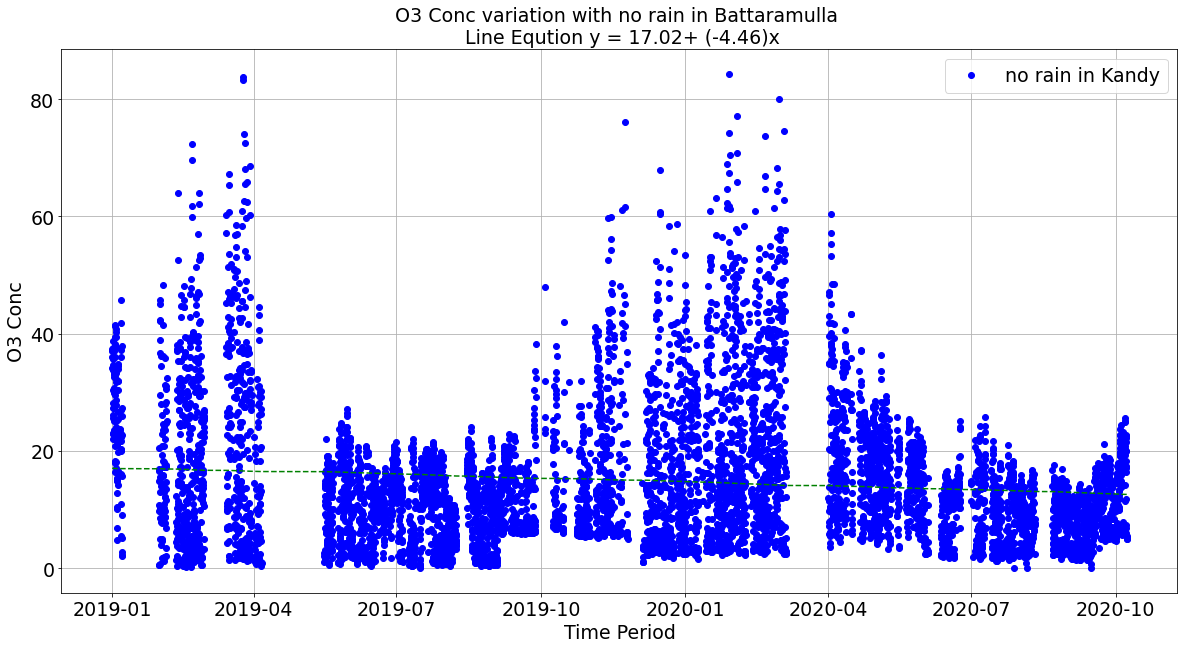

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


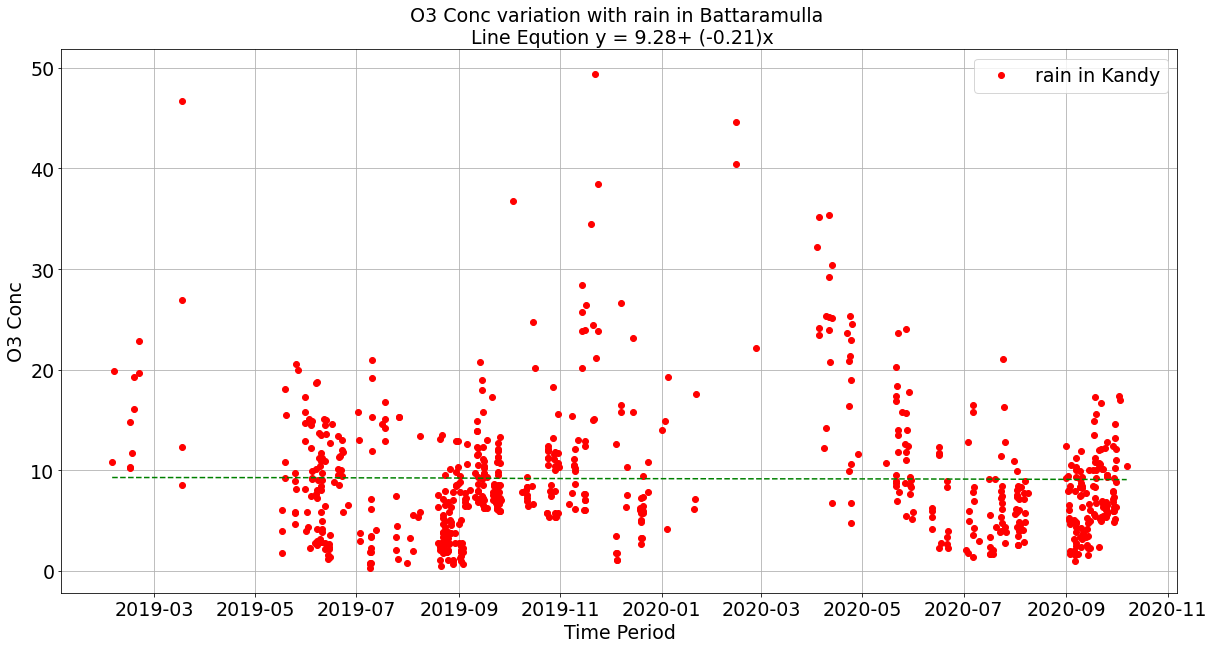

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


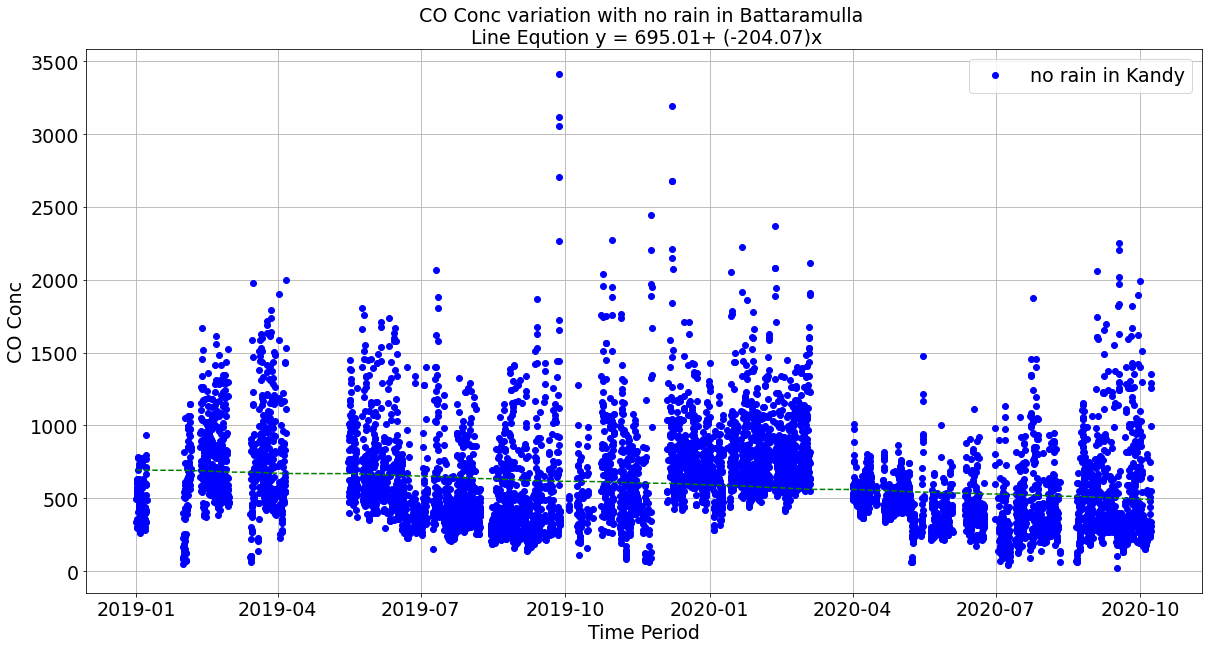

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


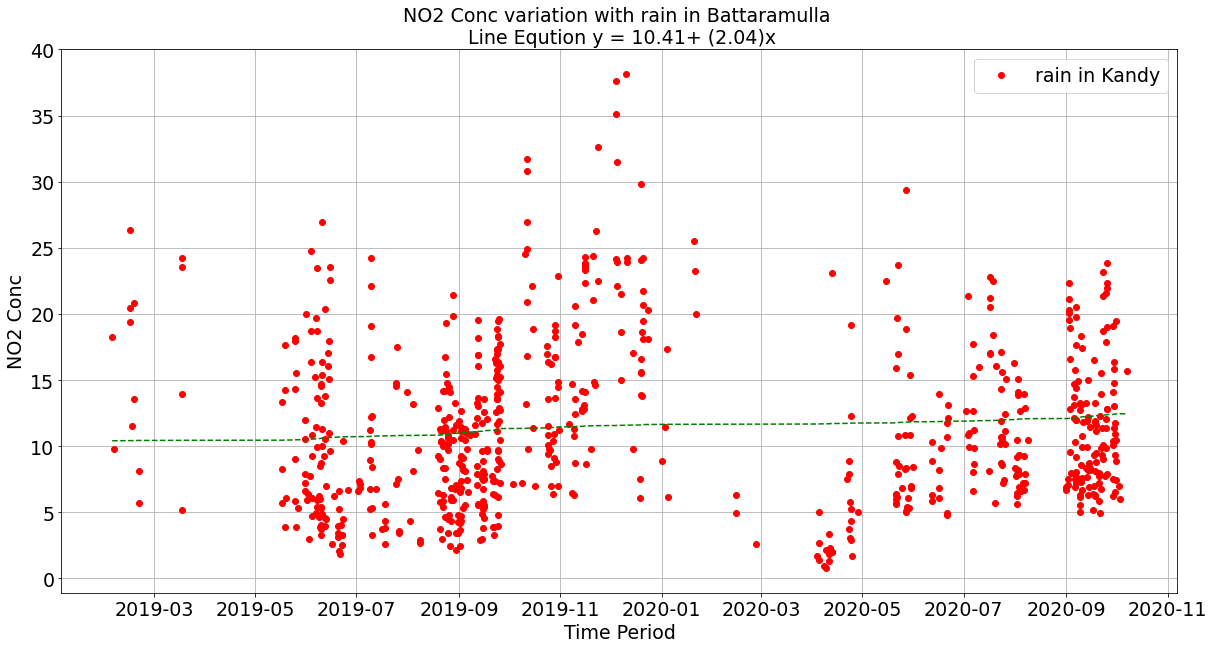

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


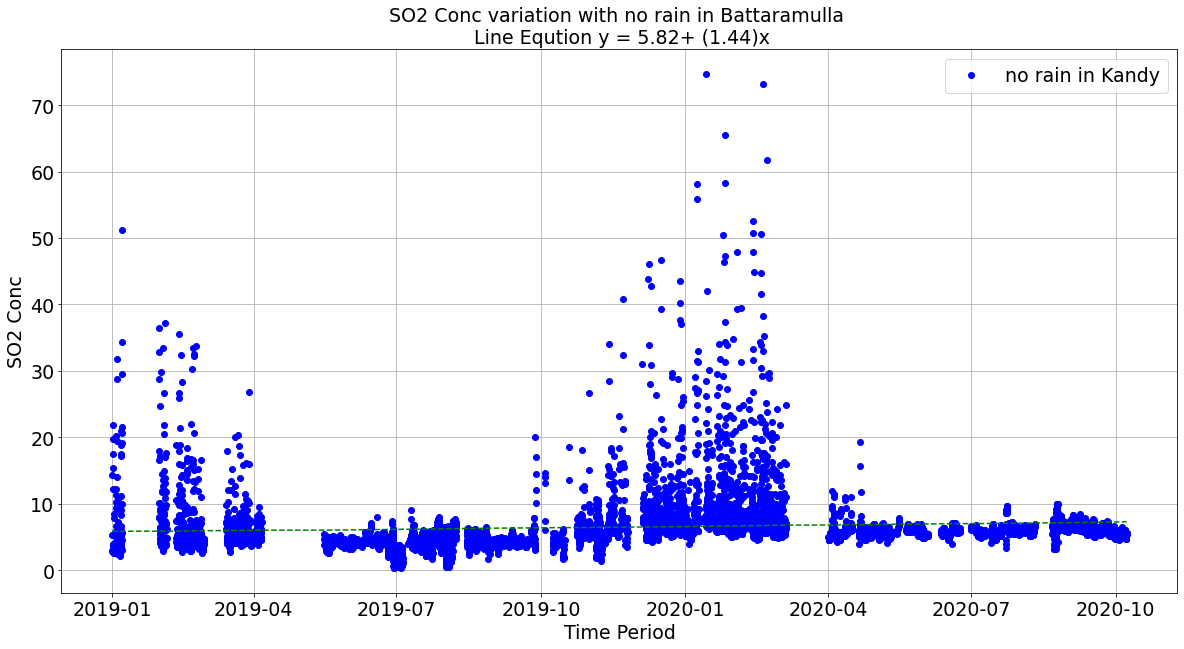

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


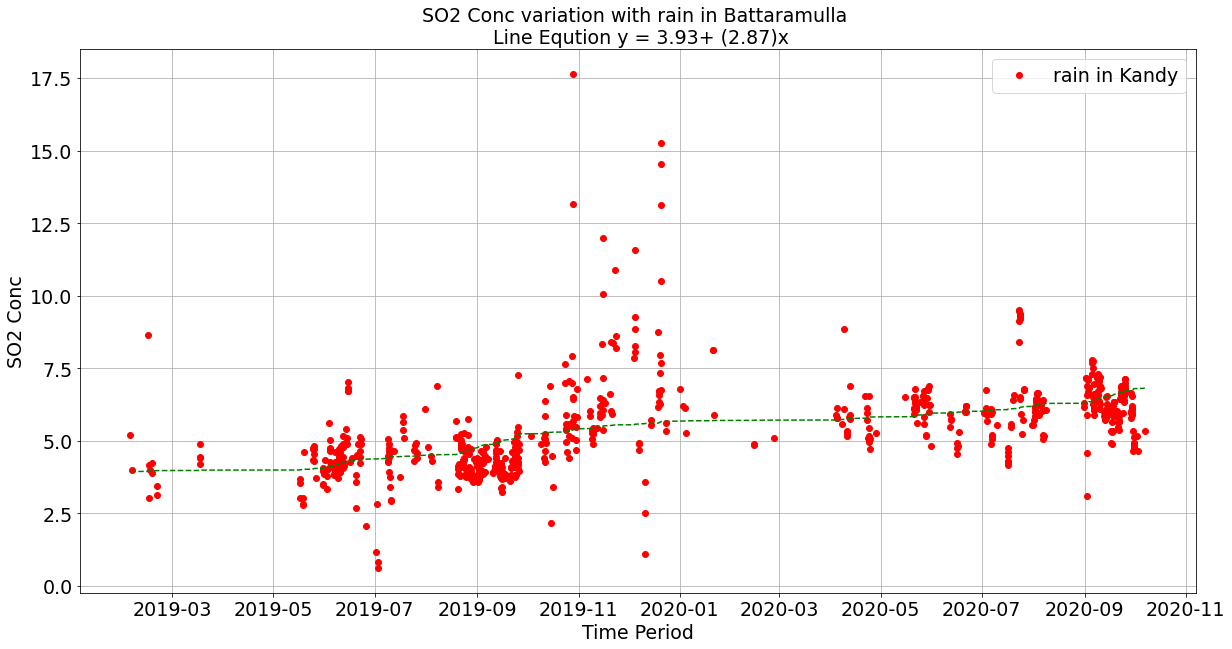

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


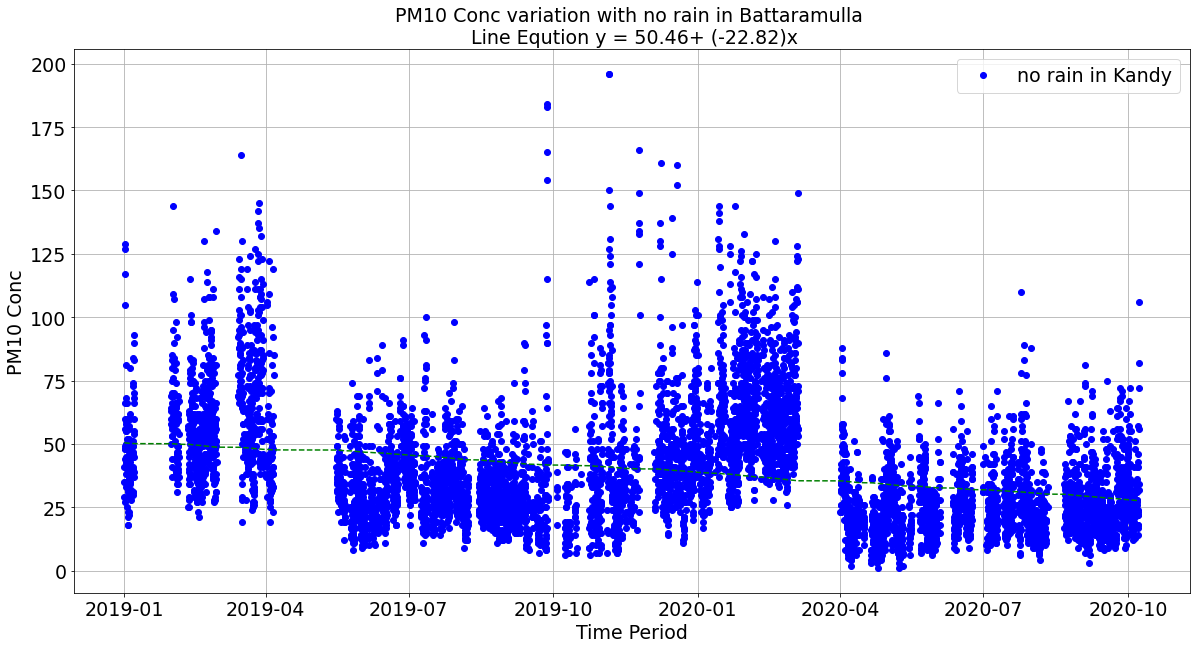

C:\Users\Lakshitha\Anaconda3\envs\newenvt\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


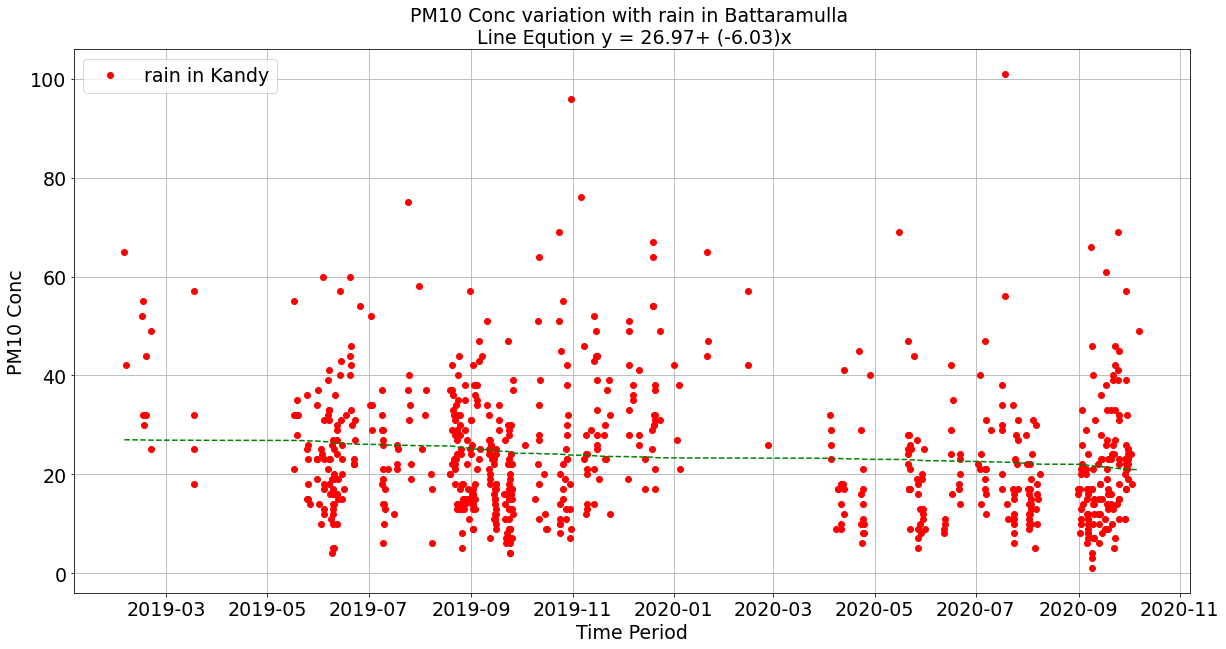

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df3 = pd.read_excel("Battaramulla_new.xlsx").dropna()
no_rain= df3[df3["Rain Gauge"] == 0]
rain= df3[df3["Rain Gauge"] > 0]

parameters = ['O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc','PM10 Conc']
SMALL_SIZE = 19
MEDIUM_SIZE = 19
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
for para in parameters:    
    no_rain.loc[:, "Period Start Time"] = pd.to_datetime(no_rain.loc[:, "Period Start Time"], format="%y-%b-%d %H:%M")
    y_values = no_rain.loc[:, para]
    x_values = np.linspace(0,1,len(no_rain.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(no_rain.loc[:, "Period Start Time"], no_rain.loc[:,para], "bo",label='no rain in Kandy')
    plt.plot(no_rain.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"{para} variation with no rain in Battaramulla \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel("Time Period")
    plt.ylabel(f"{para}")
    plt.grid()
    plt.savefig(f"Battaramulla/{para} variation with no rain in Battaramulla.png")
    plt.legend()
    plt.show()

    rain.loc[:, "Period Start Time"] = pd.to_datetime(rain.loc[:, "Period Start Time"], format="%y-%b-%d %H:%M")
    y_values = rain.loc[:, para]
    x_values = np.linspace(0,1,len(rain.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(rain.loc[:, "Period Start Time"], rain.loc[:,para], "ro",label='rain in Kandy')
    plt.plot(rain.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"{para} variation with rain in Battaramulla \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel("Time Period")
    plt.ylabel(f"{para}")
    plt.grid()
    plt.savefig(f"Battaramulla/{para} variation with rain in Battaramulla.png")
    plt.legend()
    plt.show()

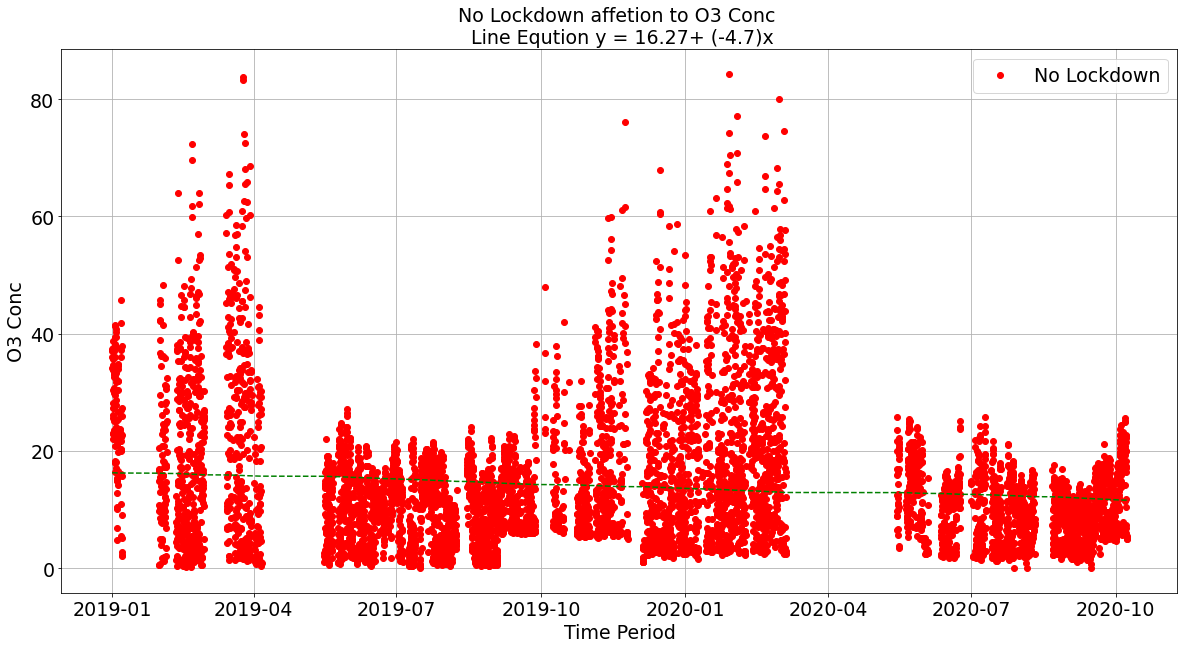

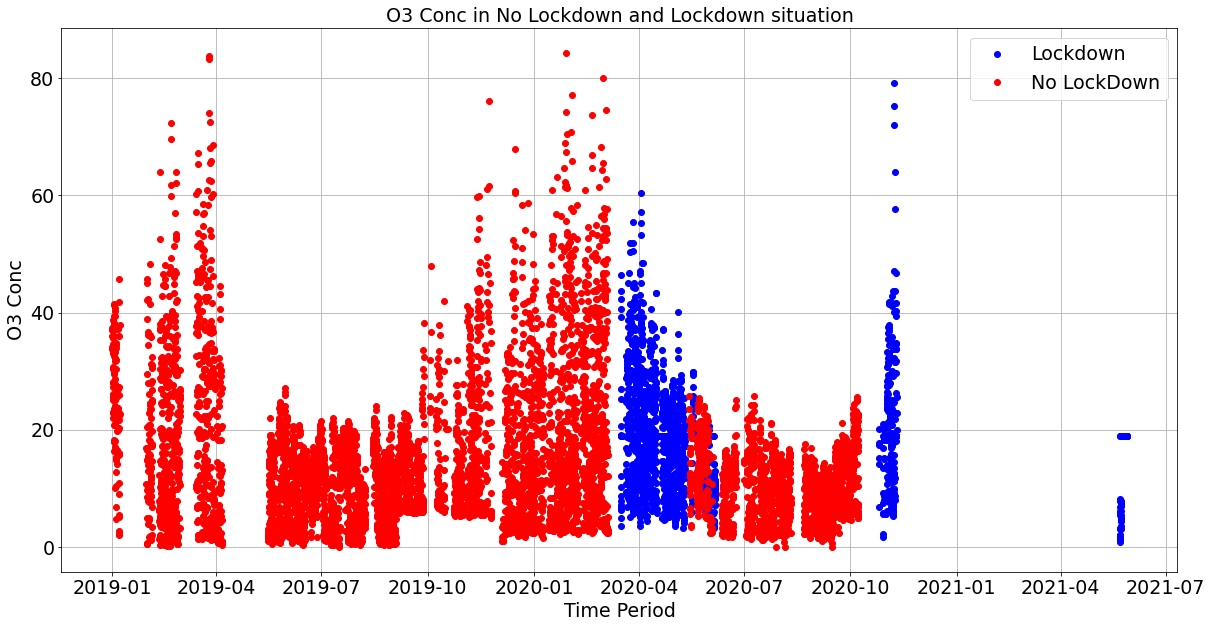

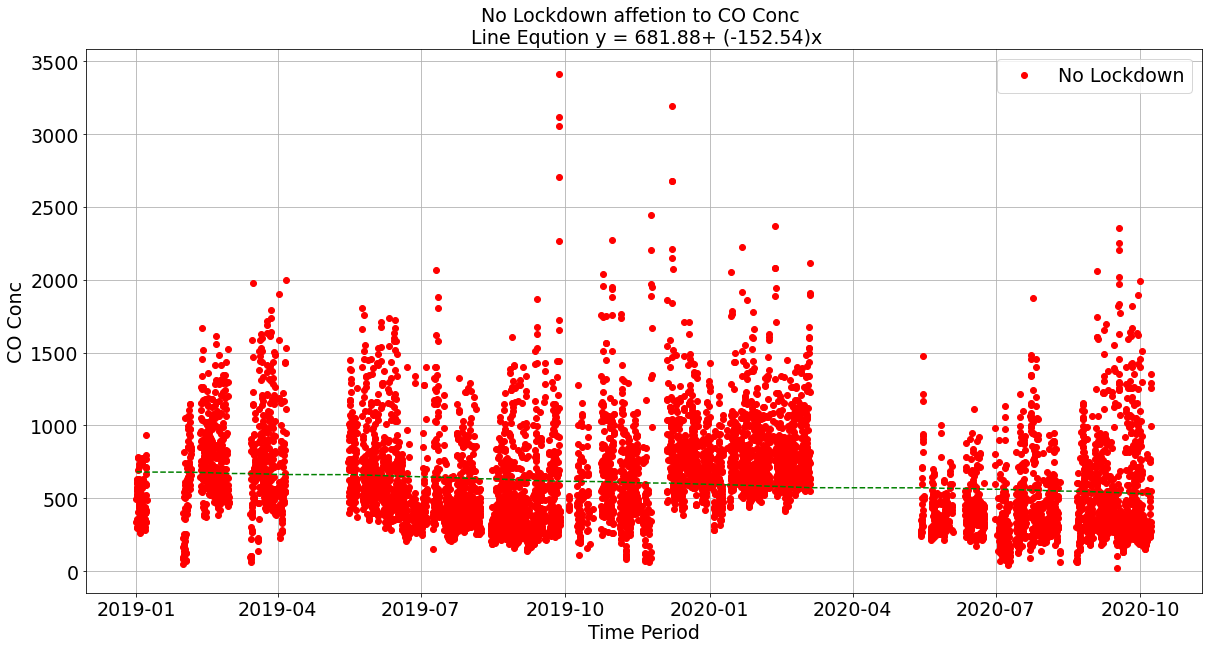

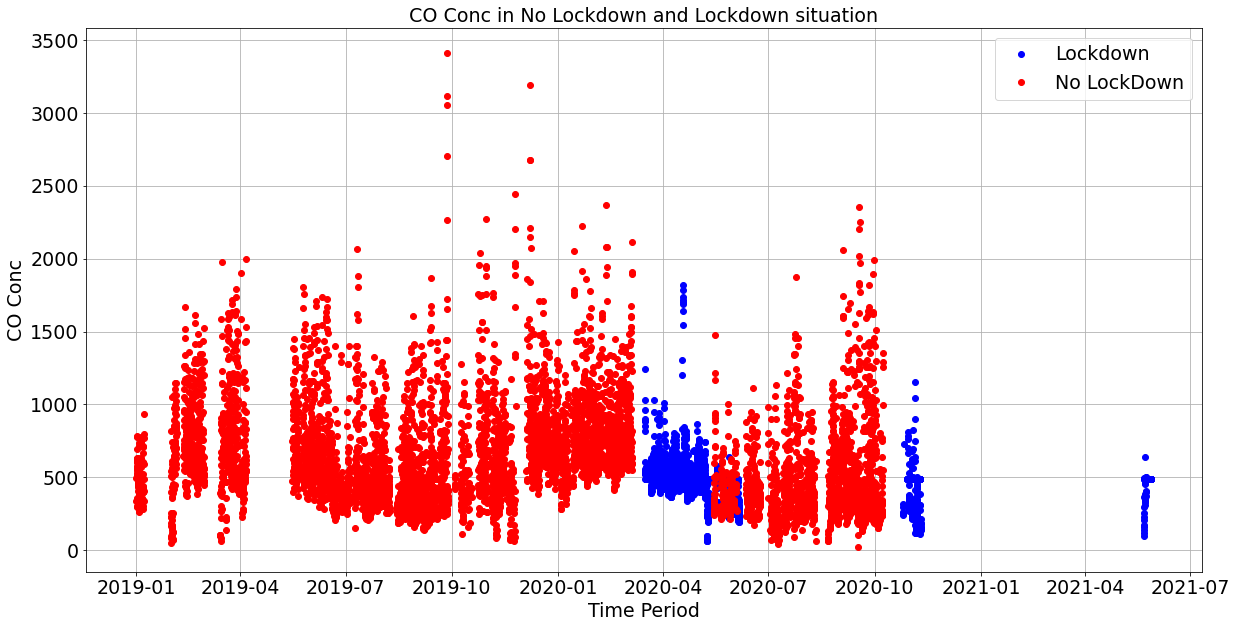

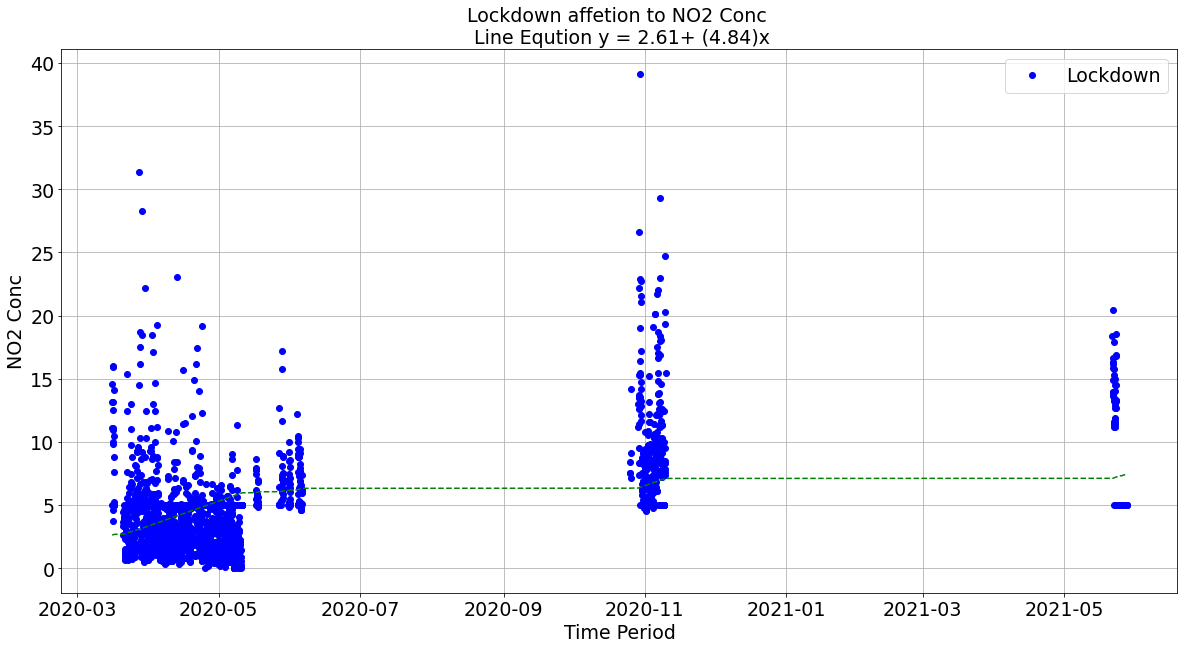

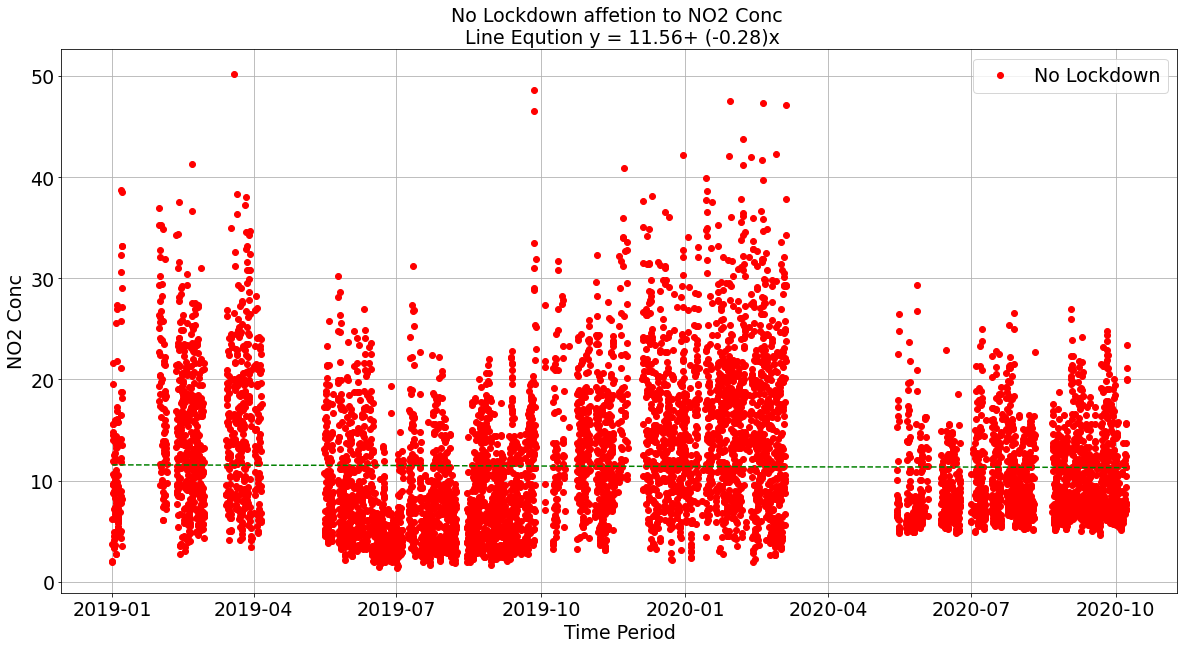

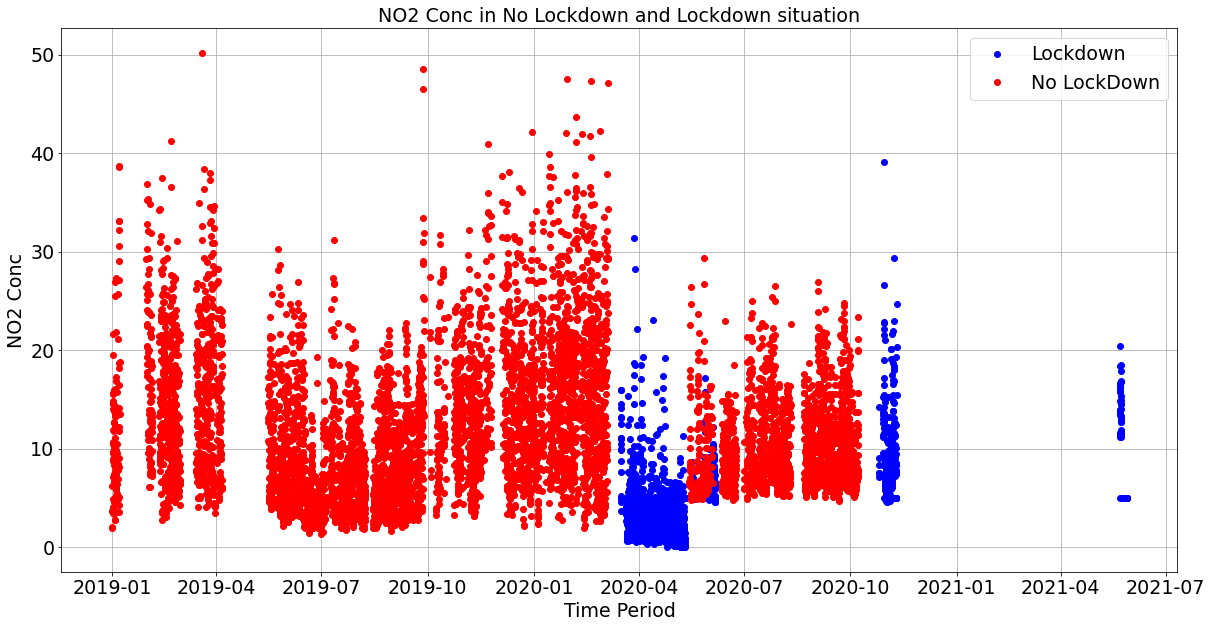

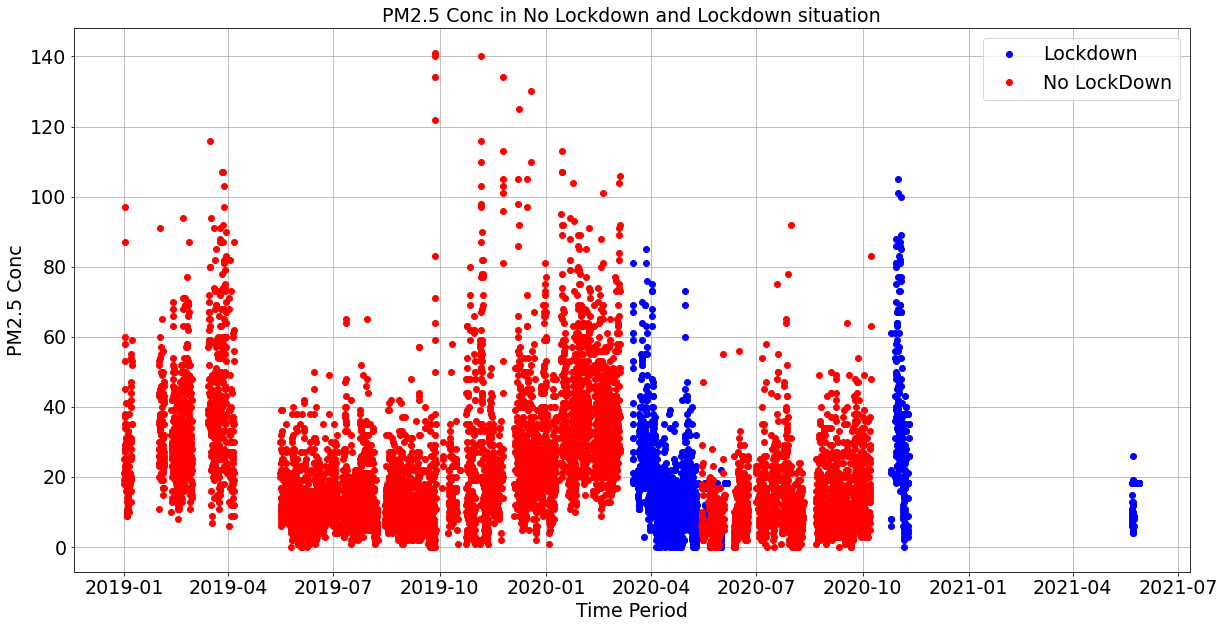

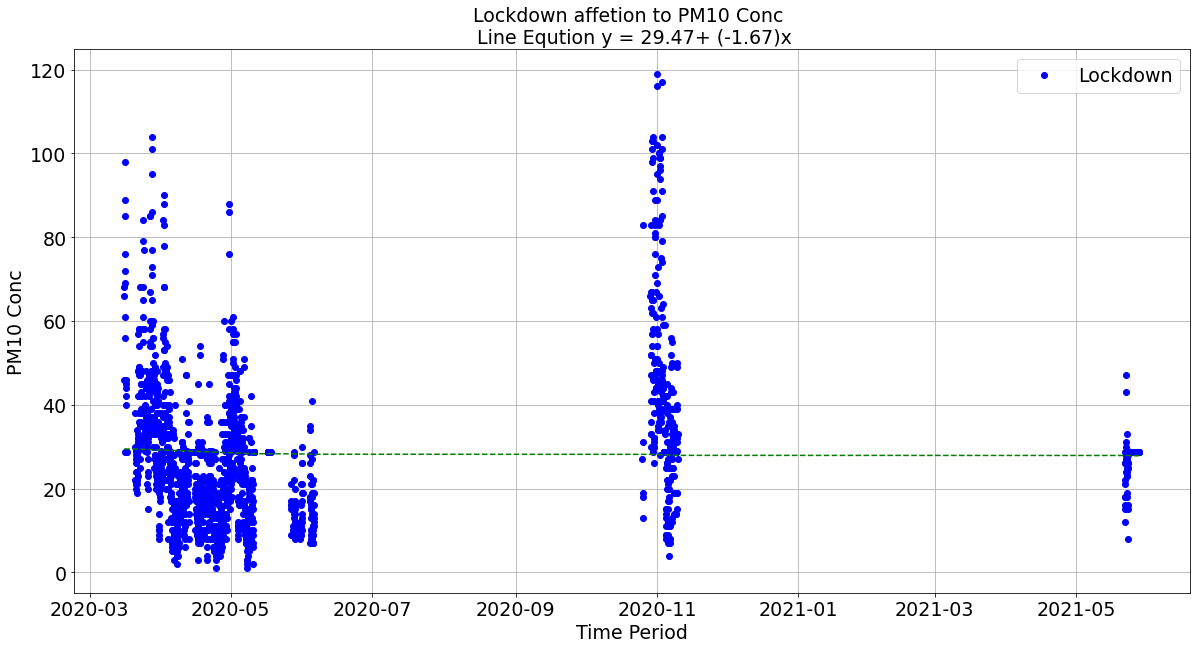

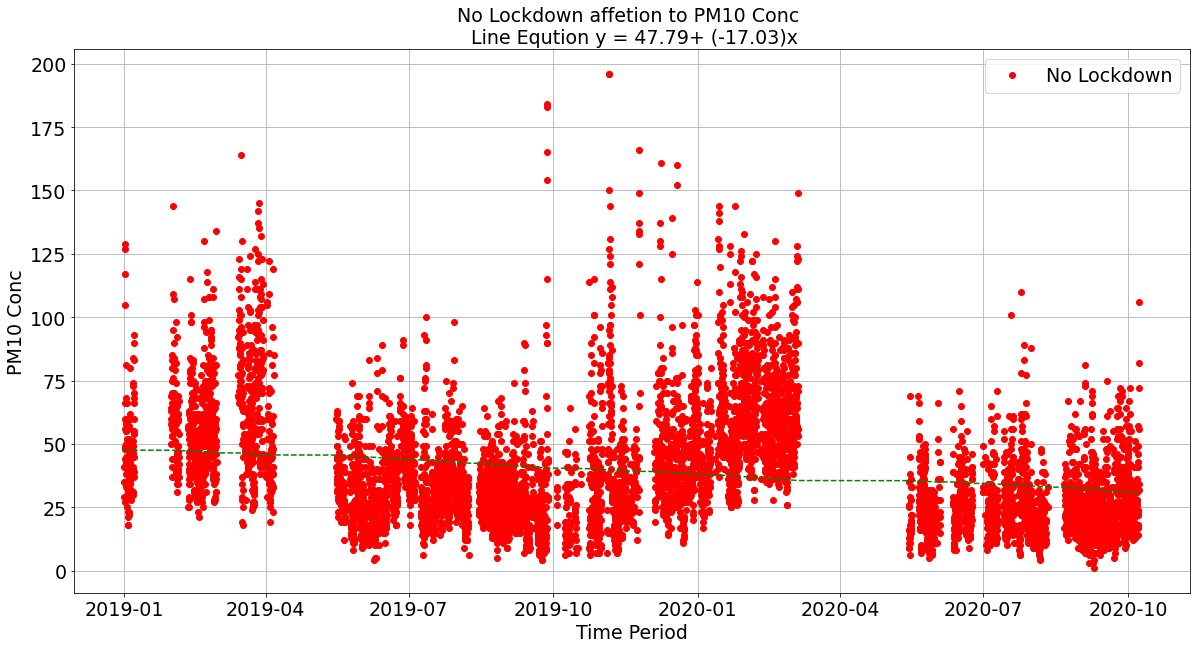

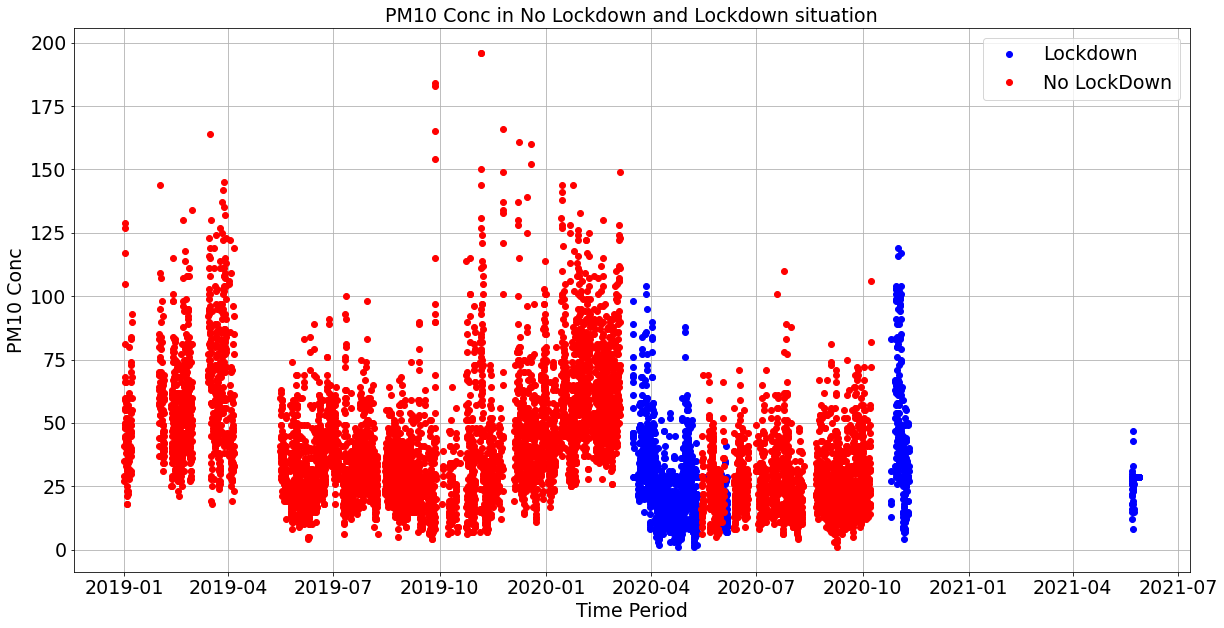

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel("B_Lockdown_new.xlsx")
df2 = pd.read_excel("B_NLK_AQMS.xlsx").dropna()
parameters = ['O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc','PM10 Conc']
title = ['AT', 'RH', 'BP', 'WS Raw', 'WD Raw',
       'O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc',
       'PM10 Conc']
for t in title:
    df1[t]=df1[t].fillna(df1[t].mean())

SMALL_SIZE = 19
MEDIUM_SIZE = 19
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

for para in parameters:
    x1_time = df1['Period Start Time']
    x1 = list(x1_time)
    y1 = list(df1[para])
    df1.loc[:, "Period Start Time"] = pd.to_datetime(df1.loc[:, "Period Start Time"], format="%b/%d/%y %H:%M")
    y_values = df1.loc[:, para]
    x_values = np.linspace(0,1,len(df1.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(df1.loc[:, "Period Start Time"], df1.loc[:,para], "bo",label='Lockdown')
    plt.plot(df1.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"Lockdown affetion to {para} \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel("Time Period")
    plt.ylabel(f"{para}")
    plt.grid()
    plt.savefig(f"Battaramulla/Lockdown affetion to {para} in Battaramulla.png")
    plt.legend()
    plt.show()


    x2 = list(df2['Period Start Time'])
    y2 = list(df2[para])
    df2.loc[:, "Period Start Time"] = pd.to_datetime(df2.loc[:, "Period Start Time"], format="%y-%b-%d %H:%M")
    y_values = df2.loc[:, para]
    x_values = np.linspace(0,1,len(df2.loc[:, para]))
    coeffs = np.polyfit(x_values, y_values, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(df2.loc[:, "Period Start Time"], df2.loc[:,para], "ro",label='No Lockdown')
    plt.plot(df2.loc[:, "Period Start Time"],y_hat,"g--")
    plt.title(f"No Lockdown affetion to {para} \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel("Time Period")
    plt.ylabel(f"{para}")
    plt.grid()
    plt.legend()
    plt.savefig(f"Battaramulla/No Lockdown affetion to {para} in Battaramulla.png")
    plt.show()
    
    plt.figure(figsize=(20,10))
    plt.plot(df1.loc[:, "Period Start Time"], df1.loc[:,para], "bo",label='Lockdown')
    plt.plot(df2.loc[:, "Period Start Time"], df2.loc[:,para], "ro",label='No LockDown')
    plt.xlabel("Time Period")
    plt.ylabel(f"{para}")
    plt.title(f"{para} in No Lockdown and Lockdown situation")
    plt.legend()
    plt.grid()
    plt.savefig(f"Battaramulla/{para} in No Lockdown and Lockdown situation in Battaramulla.png")
    plt.show()

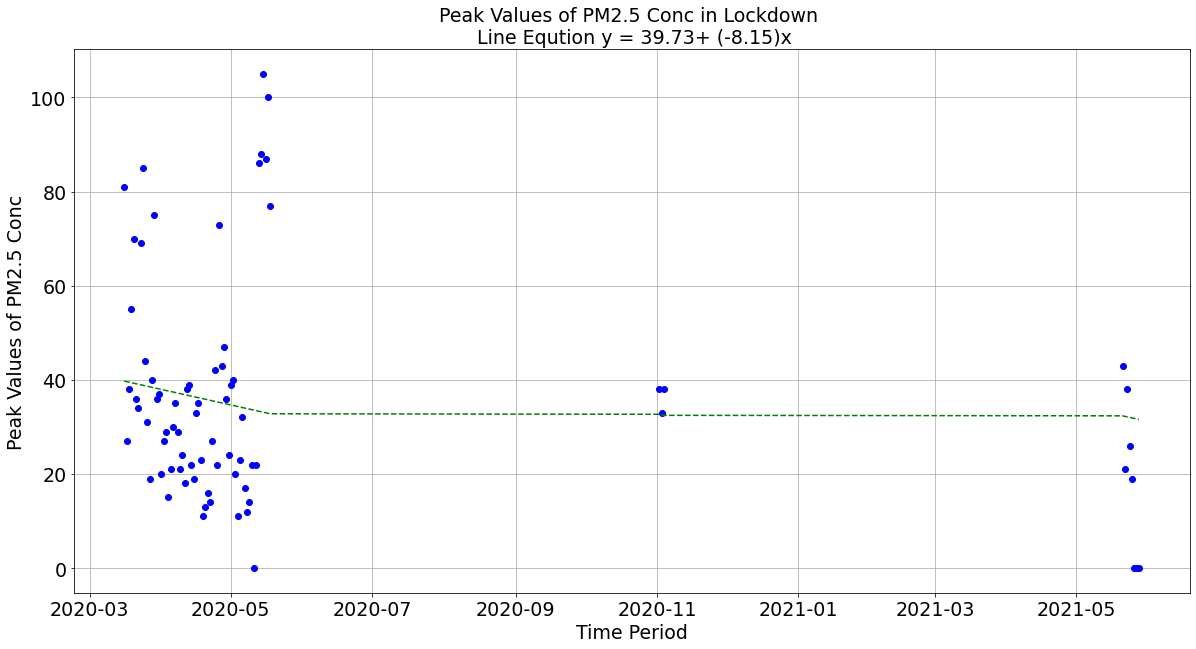

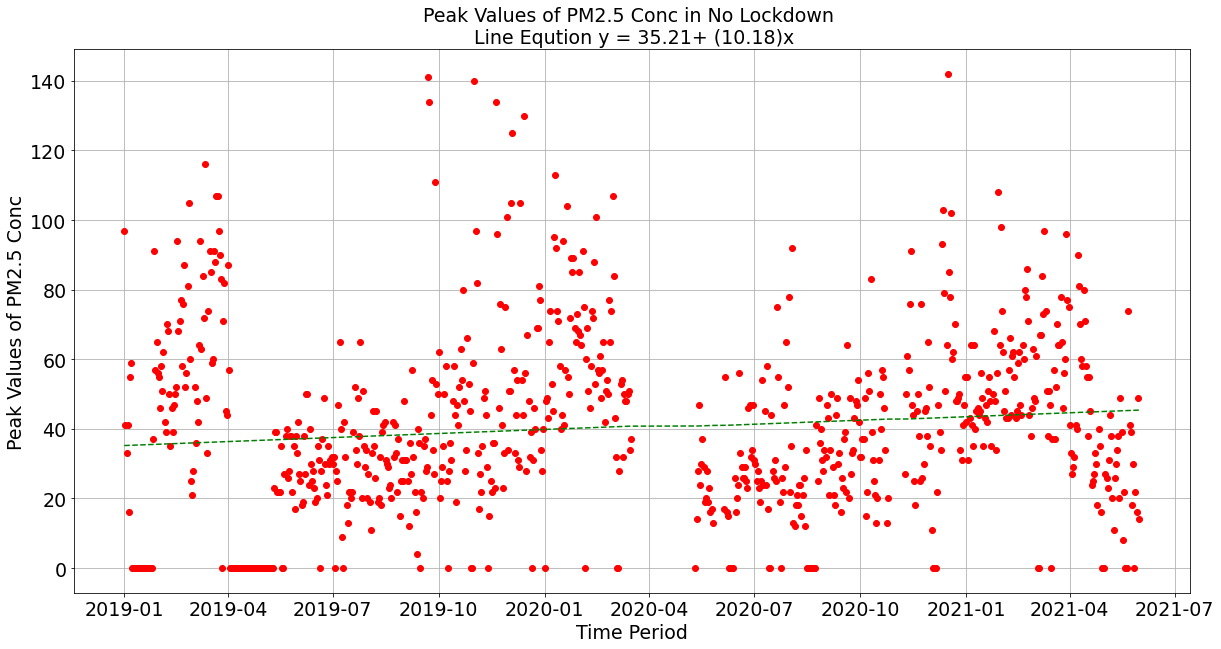

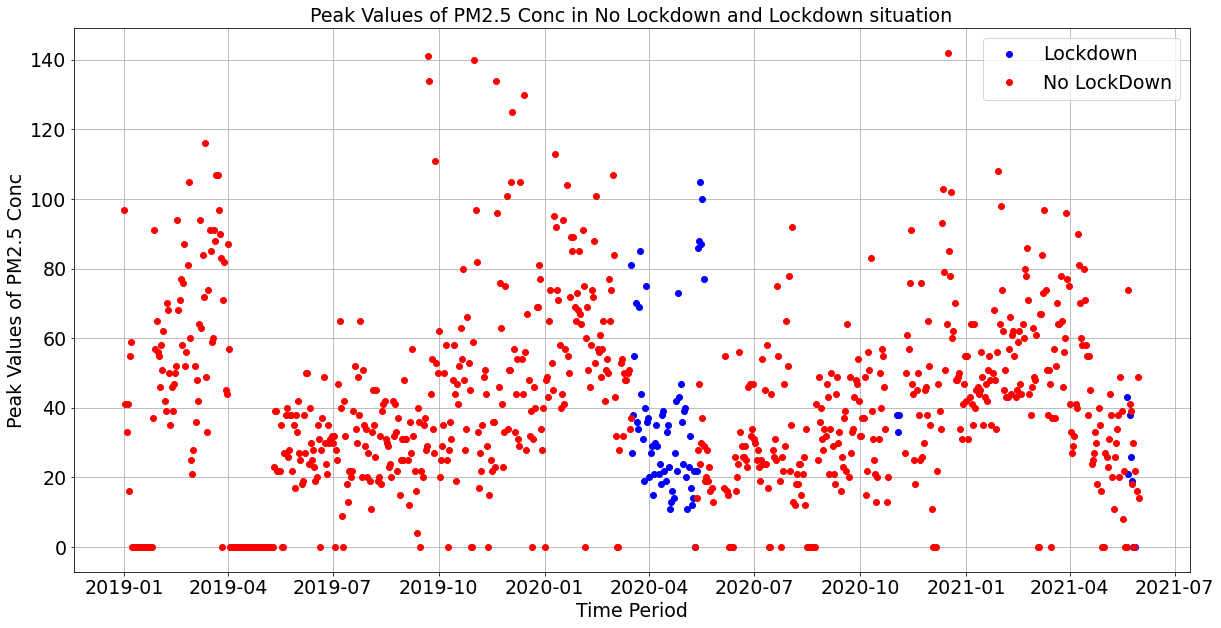

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel("peak values lockdown battaramulla.xlsx")
df2 = pd.read_excel("peak values no lockdown battaramulla.xlsx").dropna()

SMALL_SIZE = 19
MEDIUM_SIZE = 19
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

df1.loc[:, "Date"] = pd.to_datetime(df1.loc[:, "Date"], format="%b/%d/%y")
y_values = df1.loc[:, 'Peak value']
x_values = np.linspace(0,1,len(df1.loc[:, 'Peak value']))
coeffs = np.polyfit(x_values, y_values, 1)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)
plt.figure(figsize=(20,10))
plt.plot(df1.loc[:, 'Date'], df1.loc[:,'Peak value'], "bo",label='Lockdown')
plt.plot(df1.loc[:, 'Date'],y_hat,"g--")
plt.title(f"Peak Values of PM2.5 Conc in Lockdown \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
plt.xlabel("Time Period")
plt.ylabel("Peak Values of PM2.5 Conc")
plt.grid()
plt.savefig("Battaramulla/Peak Values of PM2.5 Conc in Lockdown in Battaramulla.png")
plt.show()

df2.loc[:, "Date"] = pd.to_datetime(df2.loc[:, "Date"], format="%b/%d/%y")
y_values = df2.loc[:, 'Peak value']
x_values = np.linspace(0,1,len(df2.loc[:, 'Peak value']))
coeffs = np.polyfit(x_values, y_values, 1)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)
plt.figure(figsize=(20,10))
plt.plot(df2.loc[:, 'Date'], df2.loc[:,'Peak value'], "ro",label='No LockDown')
plt.plot(df2.loc[:, 'Date'],y_hat,"g--")
plt.title(f"Peak Values of PM2.5 Conc in No Lockdown \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
plt.xlabel("Time Period")
plt.ylabel("Peak Values of PM2.5 Conc")
plt.grid()
plt.savefig("Battaramulla/Peak Values of PM2.5 Conc in No Lockdown in Battaramulla.png")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(df1.loc[:, 'Date'], df1.loc[:,'Peak value'], "bo",label='Lockdown')
plt.plot(df2.loc[:, 'Date'], df2.loc[:,'Peak value'], "ro",label='No LockDown')
plt.xlabel("Time Period")
plt.ylabel("Peak Values of PM2.5 Conc")
plt.title("Peak Values of PM2.5 Conc in No Lockdown and Lockdown situation")
plt.legend()
plt.savefig("Battaramulla/Peak Values of PM2.5 Conc in No Lockdown and Lockdown situation in Battaramulla.png")
plt.grid()
plt.show()

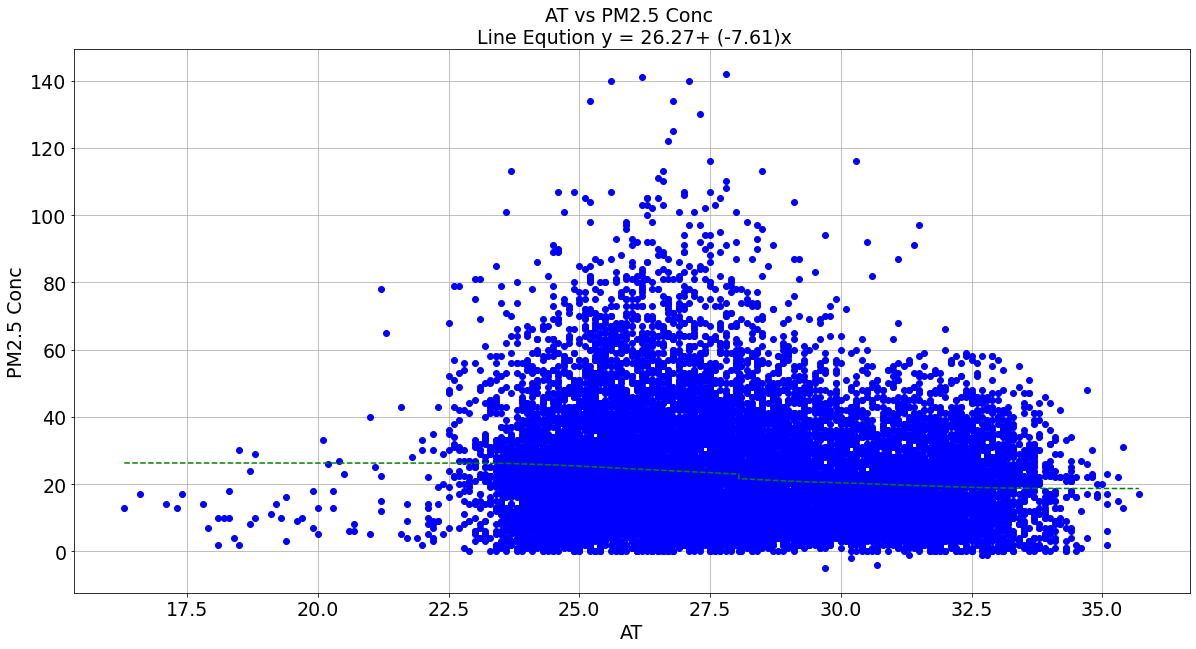

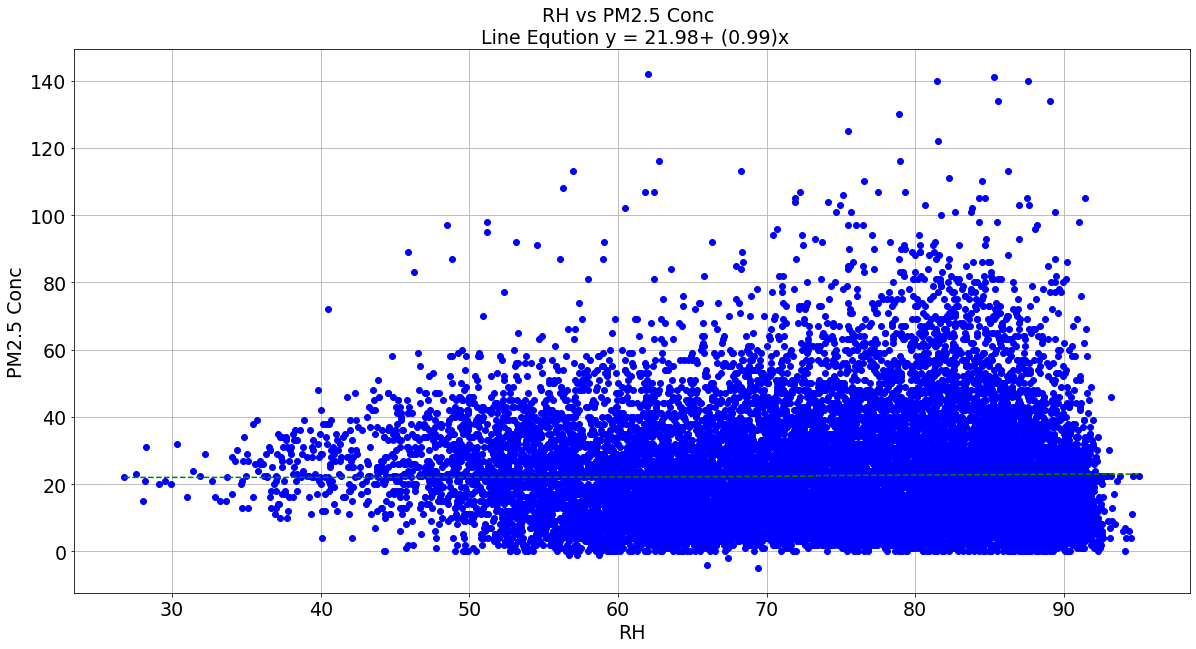

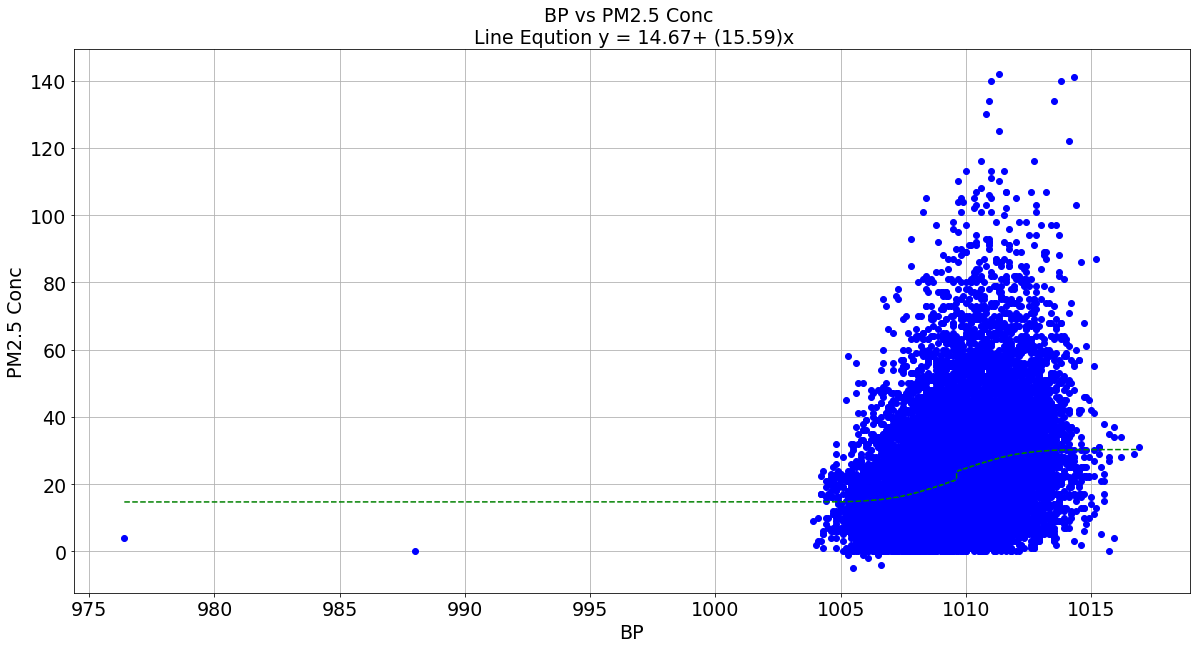

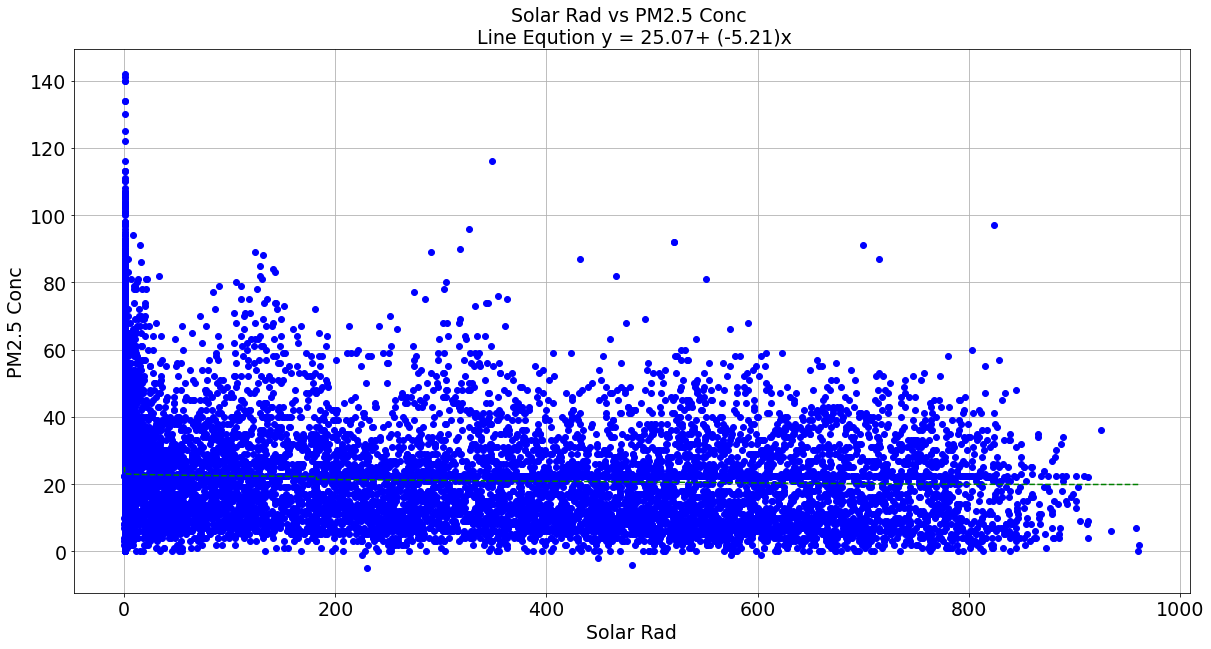

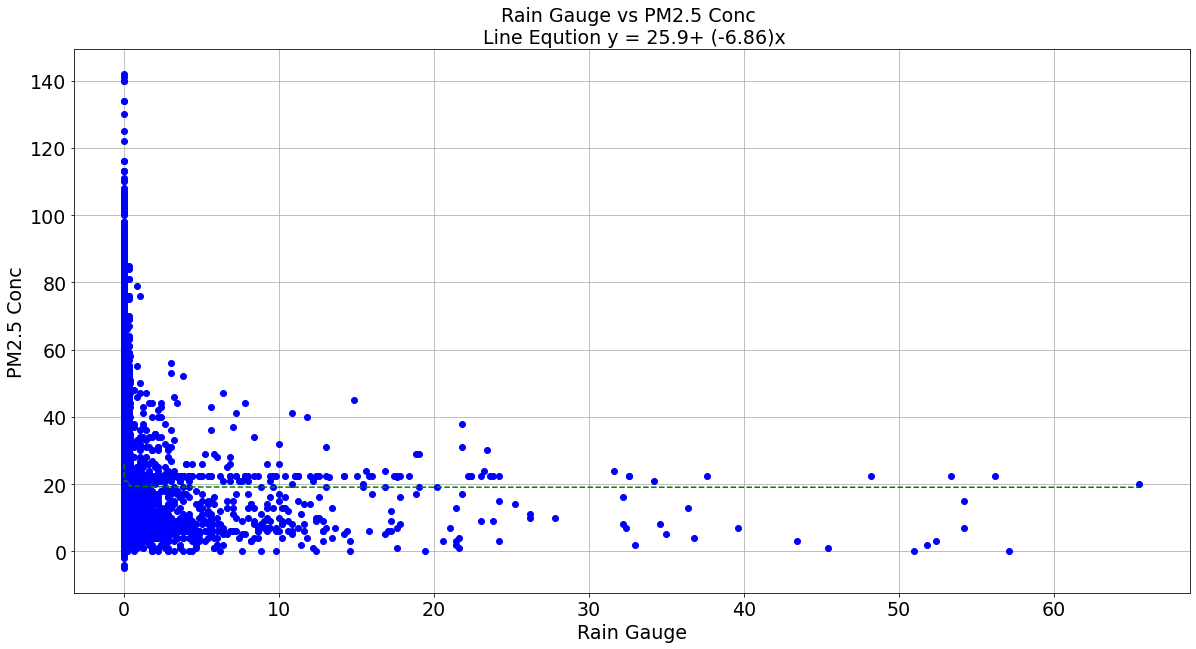

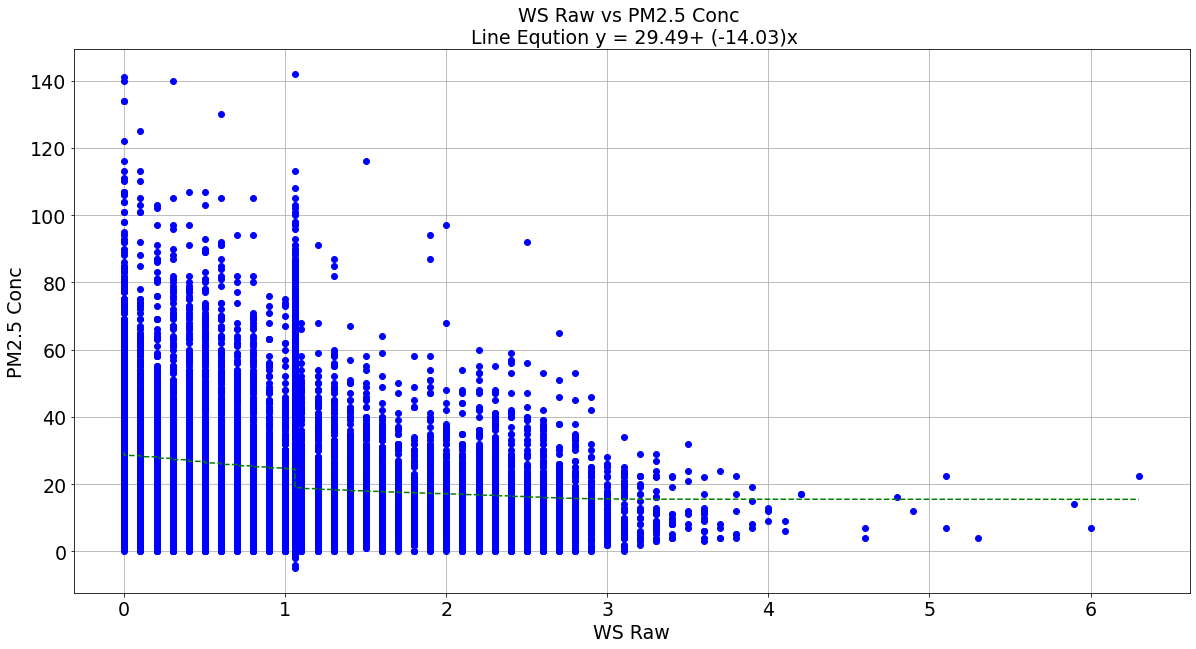

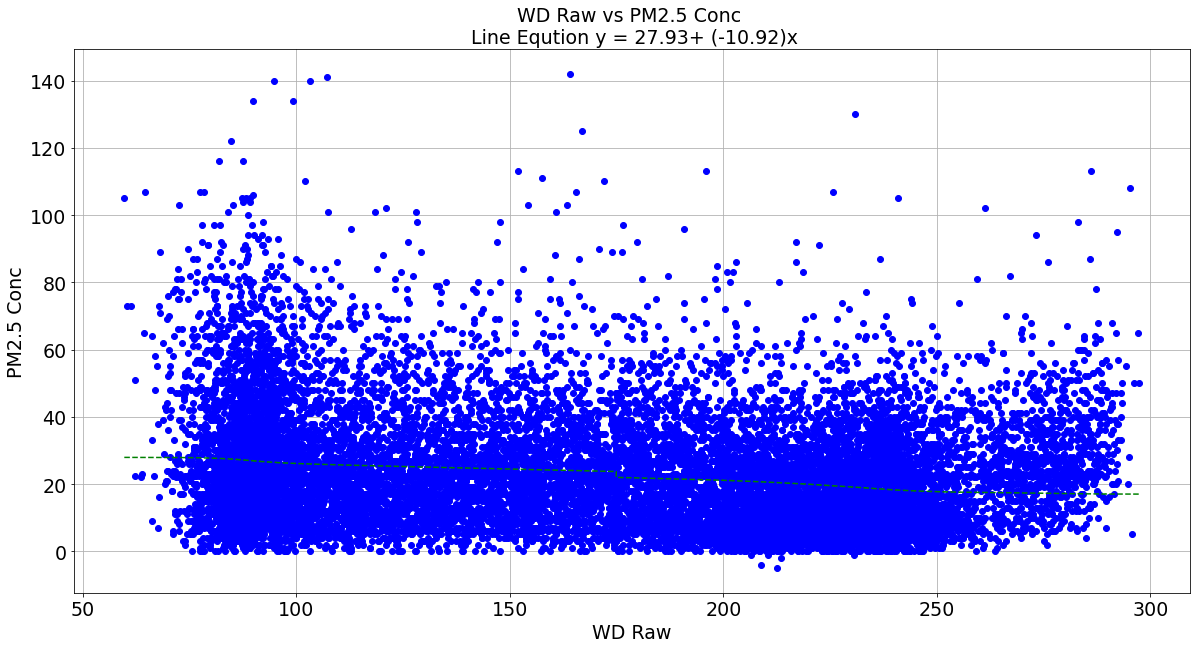

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel("Battaramulla.xlsx")
parameters = ['AT','RH','BP','Solar Rad','Rain Gauge','WS Raw','WD Raw']
title = ['AT','RH','BP','Solar Rad','Rain Gauge','WS Raw','WD Raw',
       'O3 Conc', 'CO Conc', 'NO2 Conc', 'SO2 Conc', 'PM2.5 Conc',
       'PM10 Conc']
for t in title:
    df1[t]=df1[t].fillna(df1[t].mean())

SMALL_SIZE = 19
MEDIUM_SIZE = 19
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

for para in parameters:
    x1_time = df1[para]
    x1 = list(x1_time)
    y1 = list(df1['PM2.5 Conc'])
    df1=df1.sort_values(by=para,ascending=True,kind="mergesort")
    #df1.loc[:, "Period Start Time"] = pd.to_datetime(df1.loc[:, "Period Start Time"], format="%b/%d/%y %H:%M")
    y_values = df1.loc[:, 'PM2.5 Conc']
    x_values = np.linspace(0,1,len(df1.loc[:, 'PM2.5 Conc']))
    coeffs = np.polyfit(x_values, y_values,1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_values)
    plt.figure(figsize=(20,10))
    plt.plot(df1.loc[:, para], df1.loc[:,'PM2.5 Conc'], "bo")
    plt.plot(df1.loc[:, para],y_hat,"g--")
    plt.title(f"{para} vs PM2.5 Conc \n Line Eqution y = {round(coeffs[1],2)}+ ({round(coeffs[0],2)})x")
    plt.xlabel(f"{para}")
    plt.ylabel('PM2.5 Conc')
    plt.grid()
    plt.savefig(f"Battaramulla/{para} vs PM2.5 Conc in Battaramulla.png")
    plt.show()